## Analysis of Irish Dairy Product Production and Consumption in comparison to EU Member States, regarding the rise of non-dairy product Production and Consumption in particular

This analysis aims to analyse the production and consumption of dairy products within Ireland and the impact of increasingly popular alternatives on the population's impression of dairy products. This analysis will be performed through the comparison of Ireland's situation with an EU member state with a similarly sized dairy market and output. 

Sentiment analysis will be performed to explore the apparent increase in public interest in non-dairy alternatives in recent years, and its impact on dairy product sales and consumption.

Additionally, forecasting will be performed to best characterise the future behaviour of the investigated trends, such as the downturn in the consumption of dairy milk.

## Import Required Libraries

In [287]:
#Commonly used libraries for plotting, statistical analysis and data analysis.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import pearsonr
from scipy.stats import shapiro

import tweepy
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport
import xgboost as xgb
from statsmodels.tools.eval_measures import rmse
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (GridSearchCV, cross_val_score)

## Notes on Licensing of Data

## Data Sourced from FAO

"FAO encourages you to use FAO databases for research, statistical, and scientific purposes. You may access, download, create copies and re-disseminate datasets subject to these Dataset terms.

Unless specifically stated otherwise, all datasets disseminated through the databases below are licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 3.0 IGO (CC BY-NC-SA 3.0 IGO) explained here with the additional terms listed below"-https://www.fao.org/contact-us/terms/db-terms-of-use/en/+

## Notes on Metadata

## Main Sources of Error
Overall Accuracy

"It is not possible to assess the overall accuracy but as there is a substantial amount of estimated or imputed data points, the accuracy for certain products, countries and regions is not good" - https://www.fao.org/faostat/en/#data/FBSH

Sampling Error

"No information available. In the EU the coefficient of variation shall according to regulations not exceed 3% for the area of cultivation for main crops. For non EU countries the coefficient of variation might be significantly larger. For further information see country metadata when available."

Non-sampling error

"No information available of the magnitude on non-sampling errors. One such category of errors is measurement errors which are due mainly to lack of harmonisation in statistical methods. For instance, when FAO concepts do not fit with national concepts, there may be significant measurement errors."


## General Notes

## Use of yearly data vs monthly data

Monthly data offers more data points, providing increased resolution however more noise also exists. 

## Preliminary inspection of available datasets

Relevant datasets available from reputable sources are initially explored and evaluated to determine suitable data for this analysis. Given the nature of the topic, there is limited geographical comparability due to differences in methods and coverage, except for regions with homogenous countries. Due to this convention, analysis and comparison of industries of EU member states is simpler and one is less likely to mis-interpret available data and reportings by a state.

## Notes on FAO Data

## Definition of Statistical Measures used in Datasets

"Areas refer to the area under cultivation. Area under cultivation means the area that corresponds to the total sown area, but after the harvest it excludes ruined areas (e.g. due to natural disasters). If the same land parcel is used twice in the same year, the area of this parcel can be counted twice. Production means the harvested production. Harvested production means production including on-holding losses and wastage, quantities consumed directly on the farm and marketed quantities, indicated in units of basic product weight. Yield means the harvested production per ha for the area under cultivation"- https://www.fao.org/faostat/en/#data/QCL

Unit of measure <br>

"LIVESTOCK PRIMARY: Laying [1000 heads], milk animals [heads], prod Population [No], prod Population [heads], producing Animals/Slaughtered [1000 heads], producing Animals/Slaughtered [heads], production [1000 heads], production [1000], production [heads], production [t], yield [100 mg/head], yield [No/head], yield [hg/head], yield/Carcass Weight [0.1 g/head], yield/Carcass Weight [hg/head]. 5) LIVESTOCK PROCESSED: Production is expressed in tonnes [t] "-https://www.fao.org/faostat/en/#data/QCL

Production quantity to be the metric of interest as a reflection of the demand?? All items explicitly identified as being produced from dairy milk were captured in the dataset. All those without explicit identification could not be verified and so were omitted to avoid the use of incorrect data.

A dataset containing all items relating to milk of any animal source is inspected. An inspection is performed to identify all items relating to cows milk given that it is the predominant dairy product in Ireland.

## Datasets

Production of dairy products within ireland between 1961 and 2018

In [163]:
#Inspect a dataset sourced from the Food and Agriculature Organisation of the United Nations
df=pd.read_csv("/Users/markc/Documents/Data Analytics Masters/CA2/Data/Dairy Data/X FAOSTAT Production and Yield of Dairy Products  62-21.csv")

display(df)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,250,France,5510,Production,22241.01,Butter of cow milk,1961,1961,tonnes,405000.00,A,Official figure
1,QCL,Crops and livestock products,250,France,5510,Production,22241.01,Butter of cow milk,1962,1962,tonnes,405000.00,A,Official figure
2,QCL,Crops and livestock products,250,France,5510,Production,22241.01,Butter of cow milk,1963,1963,tonnes,432000.00,A,Official figure
3,QCL,Crops and livestock products,250,France,5510,Production,22241.01,Butter of cow milk,1964,1964,tonnes,427000.00,A,Official figure
4,QCL,Crops and livestock products,250,France,5510,Production,22241.01,Butter of cow milk,1965,1965,tonnes,475000.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,QCL,Crops and livestock products,724,Spain,5510,Production,22221.01,"Whole milk, evaporated",2016,2016,tonnes,14657.71,I,Imputed value
5985,QCL,Crops and livestock products,724,Spain,5510,Production,22221.01,"Whole milk, evaporated",2017,2017,tonnes,15015.11,I,Imputed value
5986,QCL,Crops and livestock products,724,Spain,5510,Production,22221.01,"Whole milk, evaporated",2018,2018,tonnes,15267.86,I,Imputed value
5987,QCL,Crops and livestock products,724,Spain,5510,Production,22221.01,"Whole milk, evaporated",2019,2019,tonnes,14000.00,I,Imputed value


Right away we can inspect the columns within the dataset and attempt to identify which columns will be useful and which can be removed to optimise the processing of the dataset.

In [164]:
display(df.describe(include='all'))

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
count,5989,5989,5989.00,5989,5989.00,5989,5989.00,5989,5989.00,5989.00,5989,5989.00,5989,5989
unique,1,1,NaN,7,NaN,2,NaN,16,NaN,NaN,2,NaN,5,5
top,QCL,Crops and livestock products,NaN,France,NaN,Production,NaN,Raw milk of cattle,NaN,NaN,tonnes,NaN,A,Official figure
freq,5989,5989,NaN,1031,NaN,5042,NaN,854,NaN,NaN,5042,NaN,3647,3647
mean,NaN,NaN,439.46,NaN,5495.77,NaN,15456.52,NaN,1992.47,1992.47,NaN,1571374.88,NaN,NaN
std,NaN,NaN,166.61,NaN,32.84,NaN,9431.63,NaN,17.47,17.47,NaN,4672927.03,NaN,NaN
min,NaN,NaN,250.00,NaN,5420.00,NaN,2211.00,NaN,1961.00,1961.00,NaN,0.00,NaN,NaN
25%,NaN,NaN,276.00,NaN,5510.00,NaN,2292.00,NaN,1977.00,1977.00,NaN,14574.00,NaN,NaN
50%,NaN,NaN,380.00,NaN,5510.00,NaN,22130.02,NaN,1993.00,1993.00,NaN,79000.00,NaN,NaN
75%,NaN,NaN,616.00,NaN,5510.00,NaN,22221.01,NaN,2008.00,2008.00,NaN,433800.00,NaN,NaN


In [165]:
#Include unit (tonnes) in the Value column header to reduce size of dataset
df.rename(columns={'Value':'Value (Tonnes)'},inplace=True)

#Drop columns which don't add value to the analysis. Perform formatting on original df while inspecting
#dftemp
df.drop(columns=['Domain Code', 'Domain','Area Code (M49)','Element Code','Unit',
         'Item Code (CPC)','Year Code'],axis=1,inplace=True)


In [166]:
#Inspect flags on data to see which data is accurate, estimated, imputed
df['Flag Description'].unique()

array(['Official figure', 'Unofficial figure', 'Imputed value',
       'Estimated value',
       'Missing value (data cannot exist, not applicable)'], dtype=object)

Create datasets for Ireland and Spain; 6th and 7th top producers of dairy milk in EU with similar
production statistics (approx 10 Billion litres as of Jan 2022): https://www.farmersjournal.ie/who-are-the-big-players-in-the-eu-dairy-industry-663914

## Notes on temp dataset creation

Temporary datasets are created throughout the analysis to inspect segments of larger datasets. Given that these datasets are temporary, dftemp is used throughout for these inspections to optimise resource usage by overriding the previous temp dataset rather than creating a number of temp datasets that are used only once and resources are allocated to them.

## Split into Ireland and Spain Dataset, and have main DF sitting aside

In [167]:
#create main df for merging later with selling price and emissions data
dfmain = df[(df['Area'].str.contains('Ireland')) 
          | (df['Area'].str.contains('Spain'))]

display(dfmain.Area.unique())

array(['Ireland', 'Spain'], dtype=object)

In [168]:
#Create irish and spanish dataset for inspection 
dfireprod=df[df.Area=='Ireland']
dfesprod=df[df.Area=='Spain']
display("Ireland's Production and Yield Data relating to Dairy Products:",dfireprod)
display("Spain's Production and Yield Data relating to Dairy Products:",dfesprod)

"Ireland's Production and Yield Data relating to Dairy Products:"

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
1906,Ireland,Production,Butter of cow milk,1961,61300.00,A,Official figure
1907,Ireland,Production,Butter of cow milk,1962,62200.00,A,Official figure
1908,Ireland,Production,Butter of cow milk,1963,60346.00,A,Official figure
1909,Ireland,Production,Butter of cow milk,1964,64500.00,A,Official figure
1910,Ireland,Production,Butter of cow milk,1965,65845.00,A,Official figure
...,...,...,...,...,...,...,...
2625,Ireland,Production,"Whole milk, evaporated",2014,0.00,I,Imputed value
2626,Ireland,Production,"Whole milk, evaporated",2015,0.00,E,Estimated value
2627,Ireland,Production,"Whole milk, evaporated",2016,0.00,E,Estimated value
2628,Ireland,Production,"Whole milk, evaporated",2017,0.00,E,Estimated value


"Spain's Production and Yield Data relating to Dairy Products:"

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
5152,Spain,Production,Butter of cow milk,1961,3855.00,A,Official figure
5153,Spain,Production,Butter of cow milk,1962,3689.00,A,Official figure
5154,Spain,Production,Butter of cow milk,1963,3305.00,A,Official figure
5155,Spain,Production,Butter of cow milk,1964,3365.00,A,Official figure
5156,Spain,Production,Butter of cow milk,1965,3950.00,A,Official figure
...,...,...,...,...,...,...,...
5984,Spain,Production,"Whole milk, evaporated",2016,14657.71,I,Imputed value
5985,Spain,Production,"Whole milk, evaporated",2017,15015.11,I,Imputed value
5986,Spain,Production,"Whole milk, evaporated",2018,15267.86,I,Imputed value
5987,Spain,Production,"Whole milk, evaporated",2019,14000.00,I,Imputed value


Given that this dataset was produced from a larger FAO dataset containing a number of other milk sources (such as camel, sheep, goat), an inspection of the scale of production of products from sources other than cows is required to try and confirm that items not explicitly identified as being cow-milk products are in fact produced from cows milk. 

In [169]:
display(dfireprod.describe(include='all'))

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
count,724,724,724,724.00,724.00,724,724
unique,1,2,16,NaN,NaN,4,4
top,Ireland,Production,Raw milk of cattle,NaN,NaN,A,Official figure
freq,724,663,122,NaN,NaN,397,397
mean,NaN,NaN,NaN,1992.77,692418.62,NaN,NaN
std,NaN,NaN,NaN,17.64,1587317.25,NaN,NaN
min,NaN,NaN,NaN,1961.00,0.00,NaN,NaN
25%,NaN,NaN,NaN,1978.00,3750.00,NaN,NaN
50%,NaN,NaN,NaN,1994.00,35009.00,NaN,NaN
75%,NaN,NaN,NaN,2008.00,136199.50,NaN,NaN


Hanging on to the Flag and Flag Description columns for now. In time, the Flag column will be removed or maybe the Flag Description column if I can incorporate a legend into a visualisation that captures what the Flag values represent.

Inspect the production values of items not identified as products produced from cows milk and compare these production values to those of milks like sheeps milk etc to identify what type of milk was used in the production of these items.

In [170]:
#Inspect products captured in dataset.
dfireprod.Item.unique()

array(['Butter of cow milk', 'Buttermilk, dry',
       'Cheese from skimmed cow milk', 'Cheese from whole cow milk',
       'Cream, fresh', 'Raw milk of buffalo', 'Raw milk of cattle',
       'Raw milk of goats', 'Raw milk of sheep',
       'Skim milk and whey powder', 'Skim milk of cows',
       'Whey, condensed', 'Whey, dry', 'Whole milk powder',
       'Whole milk, condensed', 'Whole milk, evaporated'], dtype=object)

In [171]:
#Gain a brief insight into production values for each item. 
display("Ireland's Production and Yield of Products 2018",dfireprod[dfireprod.Year == 2018])
display("Spain's Production and Yield of Products 2018",dfesprod[dfesprod.Year == 2018])

"Ireland's Production and Yield of Products 2018"

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
1963,Ireland,Production,Butter of cow milk,2018,237800.00,A,Official figure
1970,Ireland,Production,"Buttermilk, dry",2018,21483.18,I,Imputed value
2015,Ireland,Production,Cheese from skimmed cow milk,2018,461.37,I,Imputed value
2075,Ireland,Production,Cheese from whole cow milk,2018,269400.00,A,Official figure
2135,Ireland,Production,"Cream, fresh",2018,18436.80,I,Imputed value
2138,Ireland,Production,Raw milk of buffalo,2018,0.00,A,Official figure
2199,Ireland,Yield,Raw milk of cattle,2018,57200.00,A,Official figure
2260,Ireland,Production,Raw milk of cattle,2018,7831250.00,A,Official figure
2264,Ireland,Production,Raw milk of goats,2018,0.00,A,Official figure
2268,Ireland,Production,Raw milk of sheep,2018,0.00,A,Official figure


"Spain's Production and Yield of Products 2018"

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
5209,Spain,Production,Butter of cow milk,2018,48821.00,A,Official figure
5216,Spain,Production,"Buttermilk, dry",2018,5481.14,I,Imputed value
5247,Spain,Production,Cheese from skimmed cow milk,2018,1096.08,I,Imputed value
5307,Spain,Production,Cheese from whole cow milk,2018,178831.00,A,Official figure
5355,Spain,Production,"Cream, fresh",2018,149574.72,I,Imputed value
5358,Spain,Production,Raw milk of buffalo,2018,0.00,A,Official figure
5419,Spain,Yield,Raw milk of cattle,2018,89821.00,A,Official figure
5480,Spain,Production,Raw milk of cattle,2018,7335620.00,A,Official figure
5512,Spain,Yield,Raw milk of goats,2018,2595.00,A,Official figure
5573,Spain,Production,Raw milk of goats,2018,515550.00,A,Official figure


Delete all data relating to products not produced by Ireland given that Ireland is the core country for analysis in this investigation and comparison cannot be performed if Ireland does not produce a product. 

Drop data not relating to cows milk to clean dataset and optimise analysis.

In [172]:
print(df.shape)
print(dfireprod.shape)
print(dfesprod.shape)

(5989, 7)
(724, 7)
(837, 7)


In [173]:
#Filtered main dataset, irish dataset and spanish dataset

dff = df[~(df['Item'].str.contains('sheep')) 
         & ~(df['Item'].str.contains('buffalo'))
         & ~(df['Item'].str.contains('goats'))]
dfireprodf = dfireprod[~(dfireprod['Item'].str.contains('sheep'))
                       & ~(dfireprod['Item'].str.contains('buffalo'))
                       & ~(dfireprod['Item'].str.contains('goats'))]
dfesprodf = dfesprod[~(dfesprod['Item'].str.contains('sheep')) 
         & ~(dfesprod['Item'].str.contains('buffalo'))
         & ~(dfesprod['Item'].str.contains('goats'))]



In [174]:
#sanity check
print(dff.shape)
print(dfireprodf.shape)
print(dfesprodf.shape)

(4820, 7)
(712, 7)
(647, 7)


All data now contained in the dataset relates to milk produced from cows or products derived from cows milk.

Split up production and yield data to investigate what data is available for analysis

In [175]:
#Ireland Data
dfireprodfprod=dfireprodf[dfireprodf.Element == 'Production']
dfireprodfyield=dfireprodf[dfireprodf.Element == 'Yield']


#Spain Data
dfesprodfprod=dfesprodf[dfesprodf.Element == 'Production']
dfesprodfyield=dfesprodf[dfesprodf.Element == 'Yield']

In [176]:
display('Irish Production Data',dfireprodfprod)
display('Irish Yield Data',dfireprodfyield)

display('Spanish Production Data',dfesprodfprod)
display('Spanish Yield Data',dfesprodfyield)

'Irish Production Data'

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
1906,Ireland,Production,Butter of cow milk,1961,61300.00,A,Official figure
1907,Ireland,Production,Butter of cow milk,1962,62200.00,A,Official figure
1908,Ireland,Production,Butter of cow milk,1963,60346.00,A,Official figure
1909,Ireland,Production,Butter of cow milk,1964,64500.00,A,Official figure
1910,Ireland,Production,Butter of cow milk,1965,65845.00,A,Official figure
...,...,...,...,...,...,...,...
2625,Ireland,Production,"Whole milk, evaporated",2014,0.00,I,Imputed value
2626,Ireland,Production,"Whole milk, evaporated",2015,0.00,E,Estimated value
2627,Ireland,Production,"Whole milk, evaporated",2016,0.00,E,Estimated value
2628,Ireland,Production,"Whole milk, evaporated",2017,0.00,E,Estimated value


'Irish Yield Data'

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
2142,Ireland,Yield,Raw milk of cattle,1961,19536.00,T,Unofficial figure
2143,Ireland,Yield,Raw milk of cattle,1962,20089.00,T,Unofficial figure
2144,Ireland,Yield,Raw milk of cattle,1963,20123.00,T,Unofficial figure
2145,Ireland,Yield,Raw milk of cattle,1964,19987.00,T,Unofficial figure
2146,Ireland,Yield,Raw milk of cattle,1965,19381.00,T,Unofficial figure
...,...,...,...,...,...,...,...
2198,Ireland,Yield,Raw milk of cattle,2017,52197.00,A,Official figure
2199,Ireland,Yield,Raw milk of cattle,2018,57200.00,A,Official figure
2200,Ireland,Yield,Raw milk of cattle,2019,57828.00,A,Official figure
2201,Ireland,Yield,Raw milk of cattle,2020,58799.00,A,Official figure


'Spanish Production Data'

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
5152,Spain,Production,Butter of cow milk,1961,3855.00,A,Official figure
5153,Spain,Production,Butter of cow milk,1962,3689.00,A,Official figure
5154,Spain,Production,Butter of cow milk,1963,3305.00,A,Official figure
5155,Spain,Production,Butter of cow milk,1964,3365.00,A,Official figure
5156,Spain,Production,Butter of cow milk,1965,3950.00,A,Official figure
...,...,...,...,...,...,...,...
5984,Spain,Production,"Whole milk, evaporated",2016,14657.71,I,Imputed value
5985,Spain,Production,"Whole milk, evaporated",2017,15015.11,I,Imputed value
5986,Spain,Production,"Whole milk, evaporated",2018,15267.86,I,Imputed value
5987,Spain,Production,"Whole milk, evaporated",2019,14000.00,I,Imputed value


'Spanish Yield Data'

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
5362,Spain,Yield,Raw milk of cattle,1961,20325.00,E,Estimated value
5363,Spain,Yield,Raw milk of cattle,1962,19949.00,E,Estimated value
5364,Spain,Yield,Raw milk of cattle,1963,21410.00,E,Estimated value
5365,Spain,Yield,Raw milk of cattle,1964,21086.00,E,Estimated value
5366,Spain,Yield,Raw milk of cattle,1965,22409.00,E,Estimated value
...,...,...,...,...,...,...,...
5418,Spain,Yield,Raw milk of cattle,2017,96660.00,A,Official figure
5419,Spain,Yield,Raw milk of cattle,2018,89821.00,A,Official figure
5420,Spain,Yield,Raw milk of cattle,2019,91778.00,A,Official figure
5421,Spain,Yield,Raw milk of cattle,2020,93816.00,A,Official figure


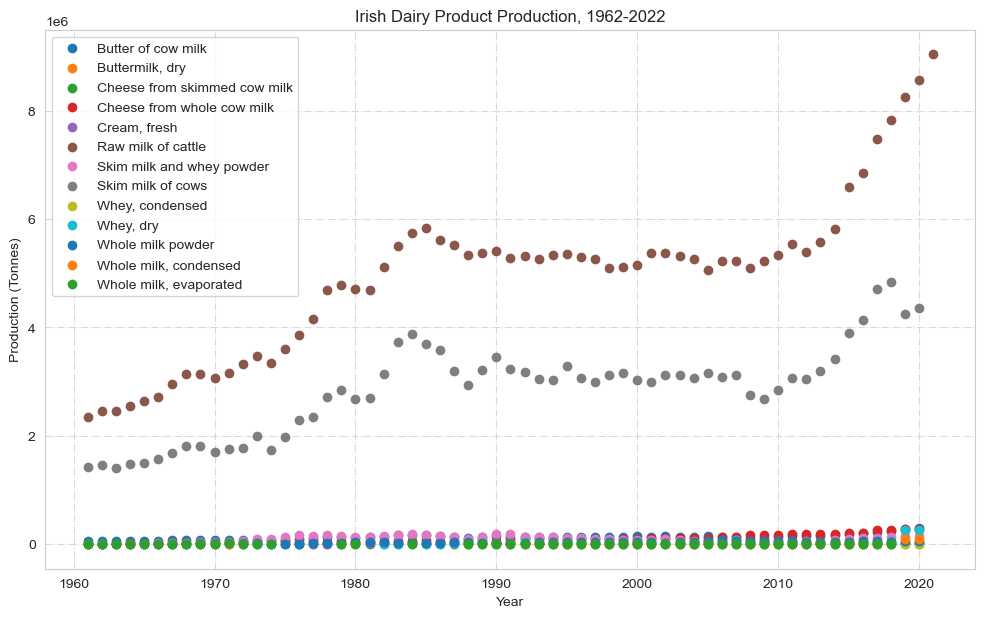

In [177]:
#plot irish production data
fig,ax=plt.subplots(figsize=(12,7))
items=dfireprodfprod['Item'].unique()

#loop through products and plot data
for i in items:
    dftemp=dfireprodfprod[dfireprodfprod.Item==i]
    ax.scatter(dftemp.Year,dftemp['Value (Tonnes)'],label=i)

leg=ax.legend(loc='upper left')
ax.set_title(f'Irish Dairy Product Production, 1962-2022')
ax.set_ylabel('Production (Tonnes)')
ax.set_xlabel('Year')
ax.grid(True,ls='-.', alpha=0.75)

#plt.savefig('dairyproductproduction.png')

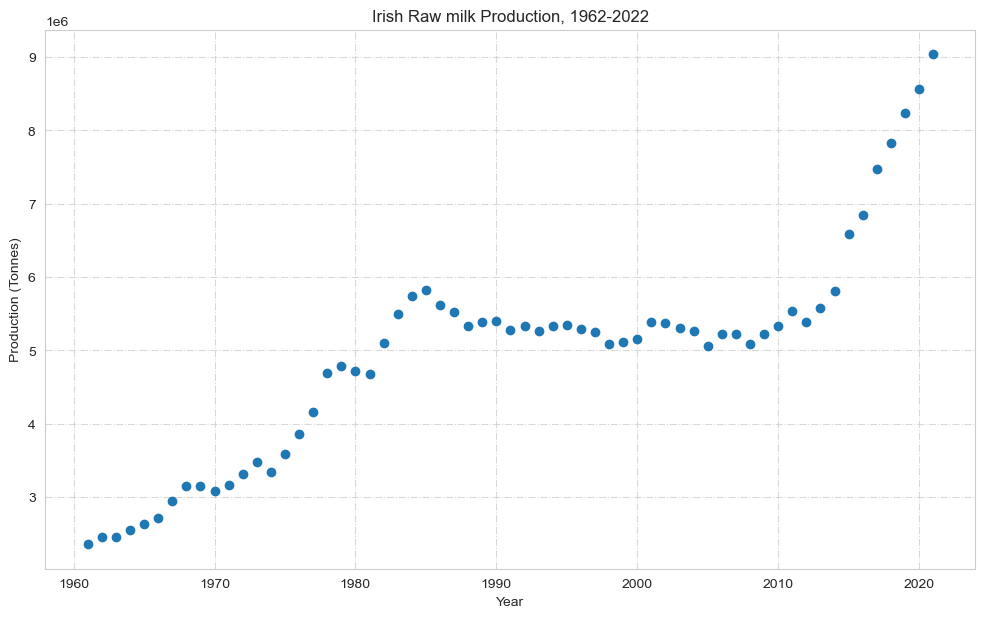

In [178]:
#plot irish production data
fig,ax=plt.subplots(figsize=(12,7))

dftemp = dfireprodfprod[(dfireprodfprod['Area'].str.contains('Ireland')) 
          & (dfireprodfprod['Item'].str.contains('Raw milk of cattle'))]
ax.scatter(dftemp.Year,dftemp['Value (Tonnes)'])
ax.set_title(f'Irish Raw milk Production, 1962-2022')
ax.set_ylabel('Production (Tonnes)')
ax.set_xlabel('Year')
ax.grid(True,ls='-.', alpha=0.75)

In [179]:
dftemp

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
2203,Ireland,Production,Raw milk of cattle,1961,2356000.00,A,Official figure
2204,Ireland,Production,Raw milk of cattle,1962,2450800.00,A,Official figure
2205,Ireland,Production,Raw milk of cattle,1963,2461100.00,A,Official figure
2206,Ireland,Production,Raw milk of cattle,1964,2548300.00,A,Official figure
2207,Ireland,Production,Raw milk of cattle,1965,2637800.00,A,Official figure
...,...,...,...,...,...,...,...
2259,Ireland,Production,Raw milk of cattle,2017,7478160.00,A,Official figure
2260,Ireland,Production,Raw milk of cattle,2018,7831250.00,A,Official figure
2261,Ireland,Production,Raw milk of cattle,2019,8244870.00,A,Official figure
2262,Ireland,Production,Raw milk of cattle,2020,8561470.00,A,Official figure


In [180]:
#Statistically characterise this data

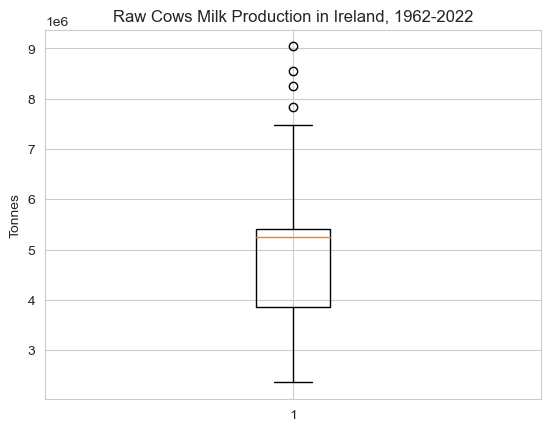

In [181]:
plt.title('Raw Cows Milk Production in Ireland, 1962-2022')
plt.boxplot(dftemp['Value (Tonnes)'])
plt.ylabel('Tonnes');

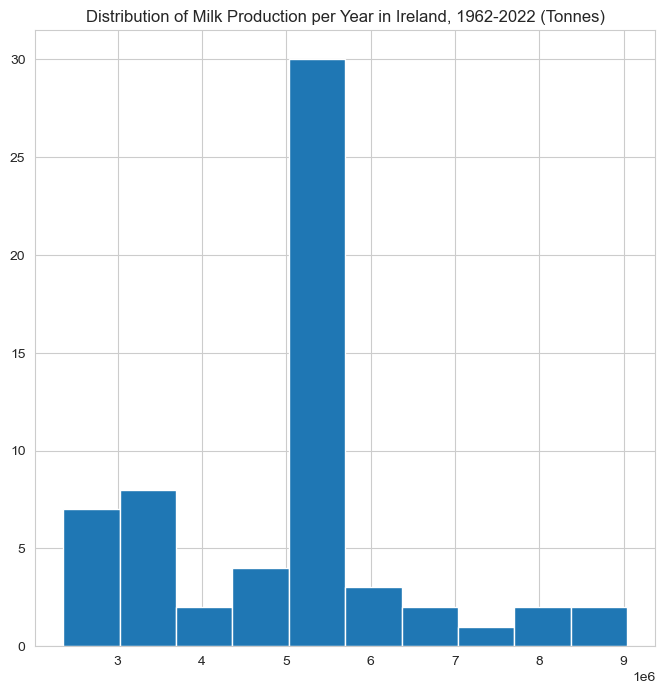

In [182]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca()
dftemp.iloc[:,4:].hist(ax=ax,bins=10)
plt.title('Distribution of Milk Production per Year in Ireland, 1962-2022 (Tonnes)')
plt.show()

Data does not look normal however we can verify this using the Shaprio Wilk test. This is a test of normality.

In [183]:
shapiro(dftemp['Value (Tonnes)'])

ShapiroResult(statistic=0.9089475870132446, pvalue=0.0002516162348911166)

We can reject the null hypothesis (the data is normal) to say that the data does not have a normal distribution as the pvalue is less than 0.05.

We can check whether our data is stationary using the Augmented Dickey-Fuller test.

In [184]:
#perform ADF test and print p value
result=adfuller(dftemp['Value (Tonnes)'])
p_value=result[1]

#compare the p value to the critical value
if p_value<0.05:
    print('This time series data is stationary.')
else:
    print('This time series data is non-stationary')
    



This time series data is non-stationary


In [185]:
#Inspect nulls and zero data
print(dfireprodfprod[dfireprodfprod['Value (Tonnes)']==0].count())


Area                45
Element             45
Item                45
Year                45
Value (Tonnes)      45
Flag                45
Flag Description    45
dtype: int64


In [186]:
dfireprodfyield

,Area,Element,Item,Year,Value (Tonnes),Flag,Flag Description
2142,Ireland,Yield,Raw milk of cattle,1961,19536.00,T,Unofficial figure
2143,Ireland,Yield,Raw milk of cattle,1962,20089.00,T,Unofficial figure
2144,Ireland,Yield,Raw milk of cattle,1963,20123.00,T,Unofficial figure
2145,Ireland,Yield,Raw milk of cattle,1964,19987.00,T,Unofficial figure
2146,Ireland,Yield,Raw milk of cattle,1965,19381.00,T,Unofficial figure
...,...,...,...,...,...,...,...
2198,Ireland,Yield,Raw milk of cattle,2017,52197.00,A,Official figure
2199,Ireland,Yield,Raw milk of cattle,2018,57200.00,A,Official figure
2200,Ireland,Yield,Raw milk of cattle,2019,57828.00,A,Official figure
2201,Ireland,Yield,Raw milk of cattle,2020,58799.00,A,Official figure


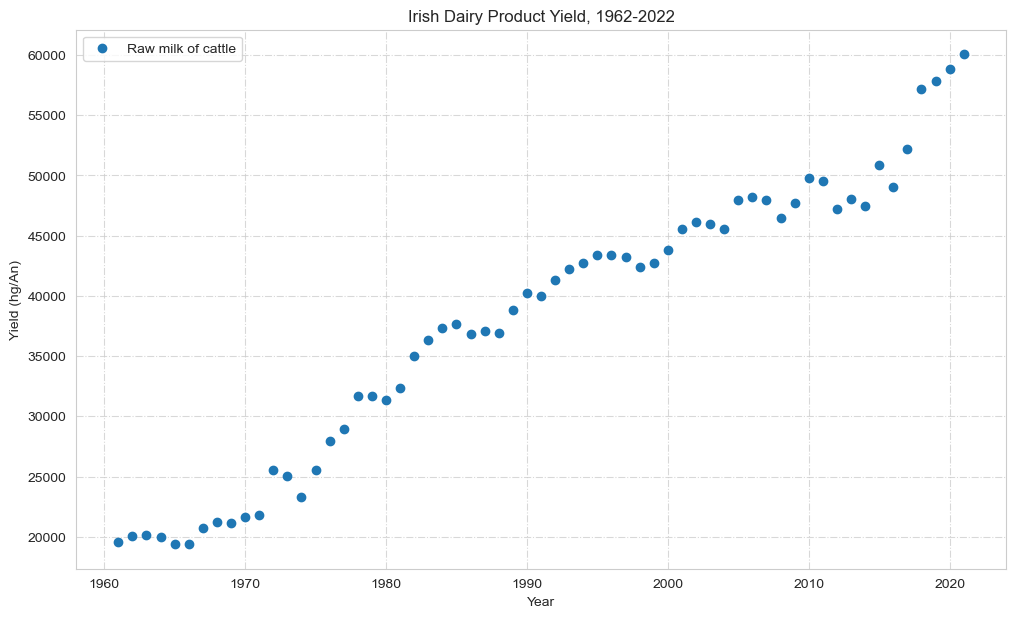

In [187]:
#plot irish yield data
fig,ax=plt.subplots(figsize=(12,7))
items=dfireprodfyield['Item'].unique()

#loop through products and plot data
for i in items:
    dftemp=dfireprodfyield[dfireprodfyield.Item==i]
    ax.scatter(dftemp.Year,dftemp['Value (Tonnes)'],label=i)

leg=ax.legend(loc='upper left')
ax.set_title(f'Irish Dairy Product Yield, 1962-2022')
ax.set_ylabel('Yield (hg/An)')
ax.set_xlabel('Year')
ax.grid(True,ls='-.', alpha=0.75)
#plt.savefig('dairyproductproduction.png')

We see that only the yield for the raw milk of cattle is captured in this case.

In [188]:
#Inspect nulls and zero data
print(dfireprodfyield[dfireprodfyield['Value (Tonnes)']==0].count())


Area                0
Element             0
Item                0
Year                0
Value (Tonnes)      0
Flag                0
Flag Description    0
dtype: int64


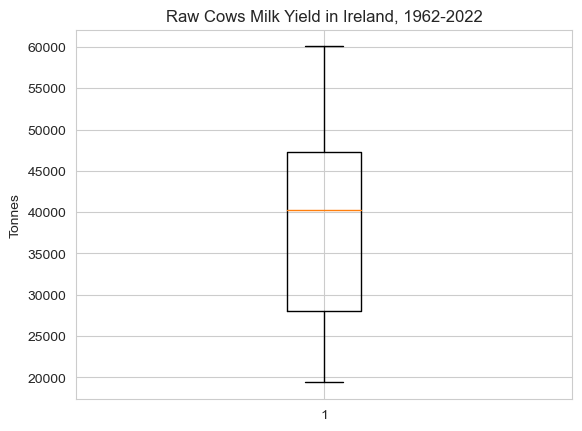

In [189]:
plt.title('Raw Cows Milk Yield in Ireland, 1962-2022')
plt.boxplot([dfireprodfyield['Value (Tonnes)']])
plt.ylabel('Tonnes');

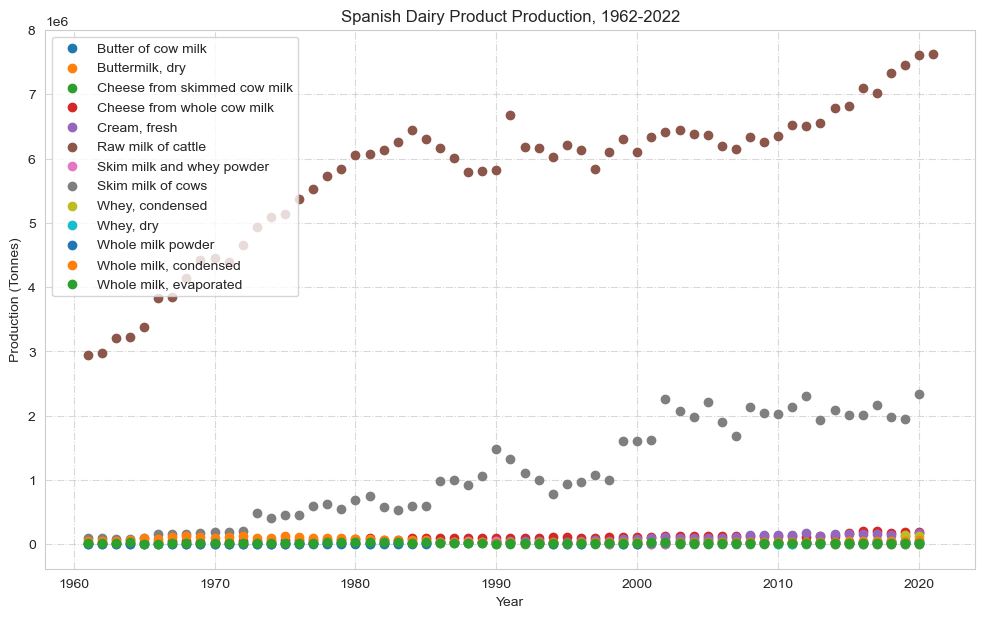

In [190]:
#plot spanish production data
fig,ax=plt.subplots(figsize=(12,7))
items=dfesprodfprod['Item'].unique()

#loop through products and plot data
for i in items:
    dftemp=dfesprodfprod[dfesprodfprod.Item==i]
    ax.scatter(dftemp.Year,dftemp['Value (Tonnes)'],label=i)

leg=ax.legend(loc='upper left')
ax.set_title(f'Spanish Dairy Product Production, 1962-2022')
ax.set_ylabel('Production (Tonnes)')
ax.set_xlabel('Year')
ax.grid(True,ls='-.', alpha=0.75)
#plt.savefig('dairyproductproduction.png')

In [191]:
#Inspect nulls and zero data
print(dfesprodfprod[dfesprodfprod['Value (Tonnes)']==0].count())

Area                22
Element             22
Item                22
Year                22
Value (Tonnes)      22
Flag                22
Flag Description    22
dtype: int64


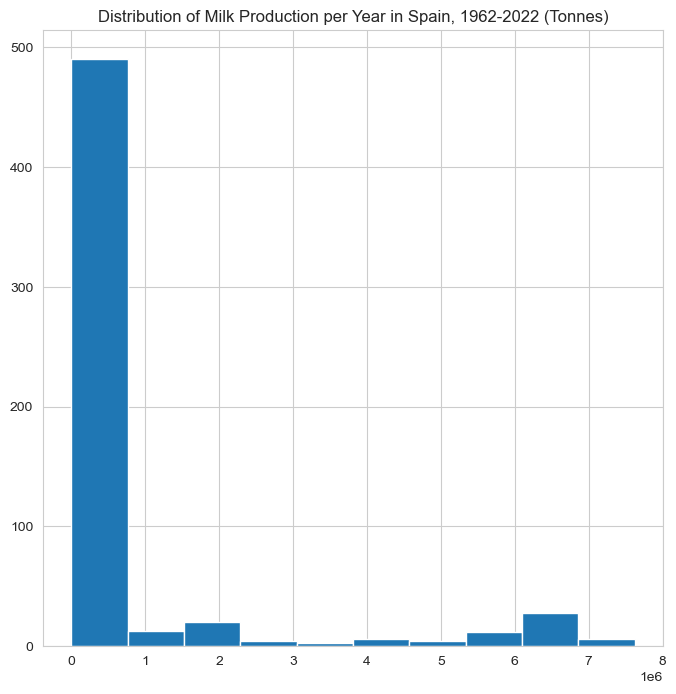

In [192]:
dftemp=dfesprodfprod.Item
fig=plt.figure(figsize=(8,8))
ax=fig.gca()
dfesprodfprod.iloc[:,4:].hist(ax=ax,bins=10)
plt.title('Distribution of Milk Production per Year in Spain, 1962-2022 (Tonnes)')
plt.show()

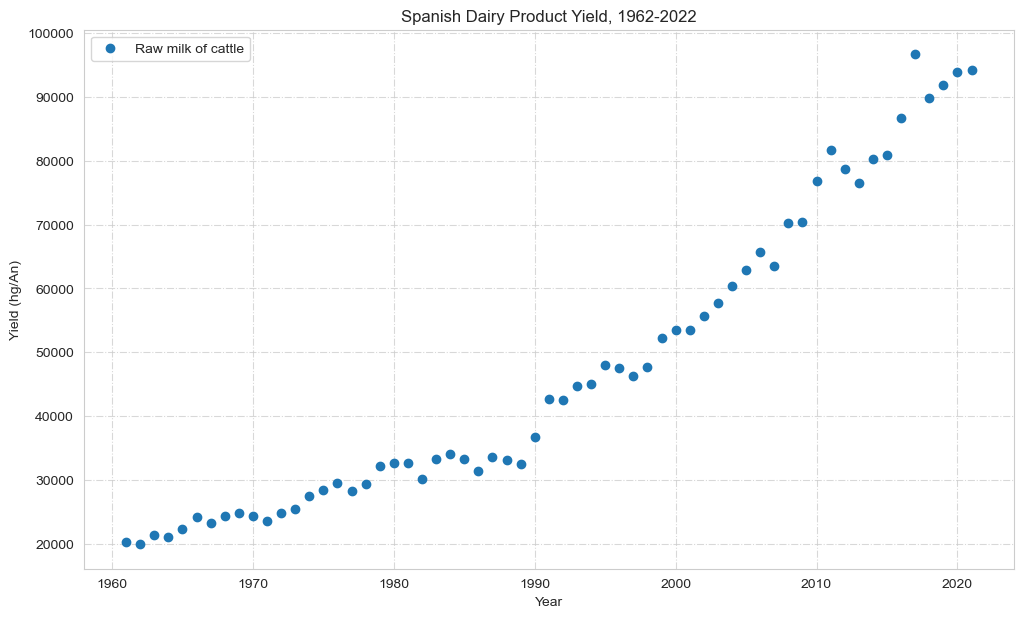

In [193]:
#plot spanish yield data
fig,ax=plt.subplots(figsize=(12,7))
items=dfesprodfyield['Item'].unique()

#loop through products and plot data
for i in items:
    dftemp=dfesprodfyield[dfesprodfyield.Item==i]
    ax.scatter(dftemp.Year,dftemp['Value (Tonnes)'],label=i)

leg=ax.legend(loc='upper left')
ax.set_title(f'Spanish Dairy Product Yield, 1962-2022')
ax.set_ylabel('Yield (hg/An)')
ax.set_xlabel('Year')
ax.grid(True,ls='-.', alpha=0.75)

We can compare the production data of Ireland and Spain's using a Pearson's correlation test.

In [194]:
dftempire=dfireprodfprod[(dfireprodfprod['Area'].str.contains('Ireland')) 
          & (dfireprodfprod['Item'].str.contains('Raw milk of cattle'))]

dftempes=dfesprodfprod[(dfesprodfprod['Area'].str.contains('Spain')) 
          & (dfesprodfprod['Item'].str.contains('Raw milk of cattle'))]


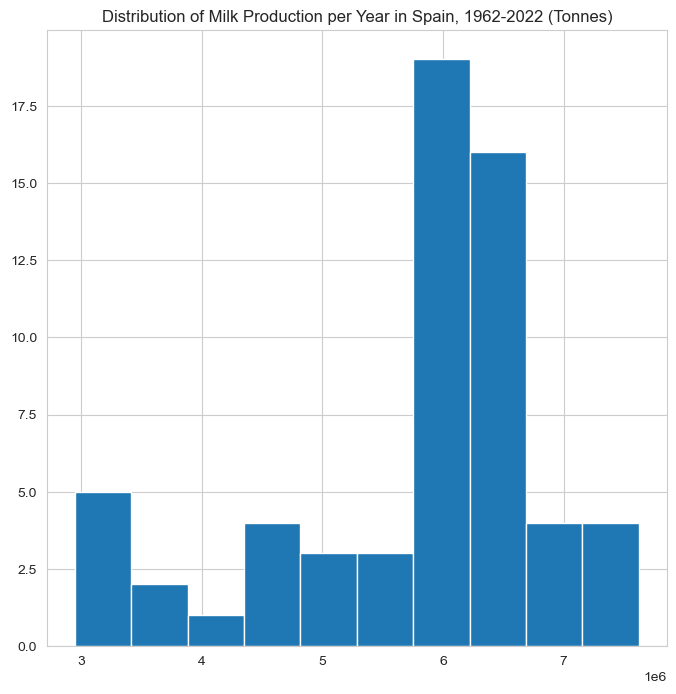

In [195]:
dftemp=dfesprodfprod.Item
fig=plt.figure(figsize=(8,8))
ax=fig.gca()
dftempes.iloc[:,4:].hist(ax=ax,bins=10)
plt.title('Distribution of Milk Production per Year in Spain, 1962-2022 (Tonnes)')
plt.show()

In [196]:
corr,p_value=pearsonr(dftempire['Value (Tonnes)'],dftempes['Value (Tonnes)'])

print('Correlation Coefficient: ', corr)
print('p-value:',p_value)

Correlation Coefficient:  0.9273039671903603
p-value: 7.360315833592953e-27


A strong positive correlation is identified between the time series data relating to the productiong of cows milk in Ireland and Spain from 1961 to modern day. The extremely small p value indicates that the correlation coefficient is statistically significant given that it is less than 0.05.

This data can be plotted also to visualise their correlation

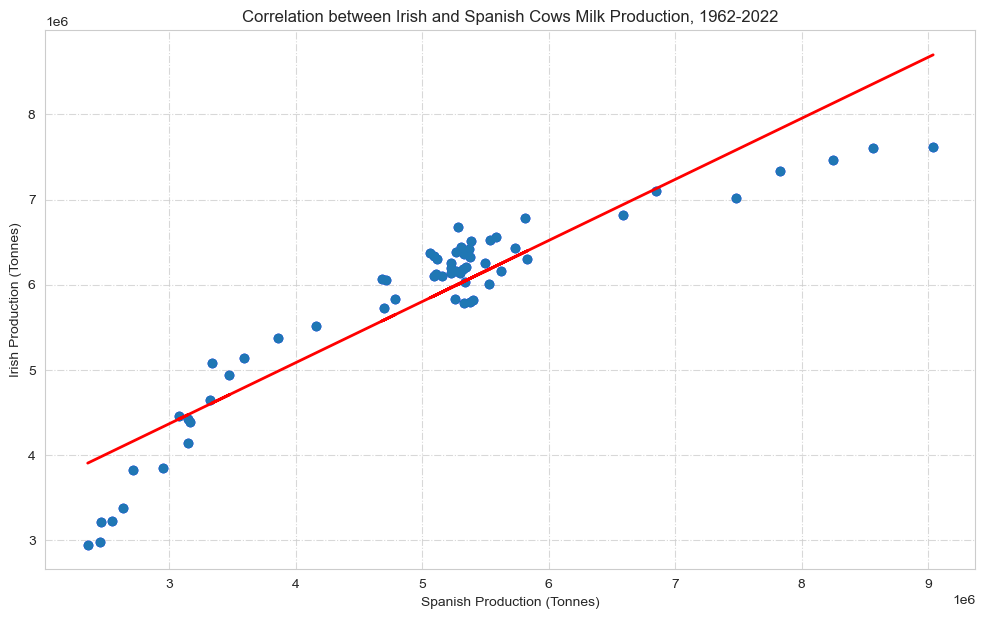

In [197]:
#plot correlation
fig,ax=plt.subplots(figsize=(12,7))

ax.scatter(dftempire['Value (Tonnes)'],dftempes['Value (Tonnes)'],color='b')
ax.set_title(f'Correlation between Irish and Spanish Cows Milk Production, 1962-2022')
ax.set_ylabel('Irish Production (Tonnes)')
ax.set_xlabel('Spanish Production (Tonnes)')
ax.grid(True,ls='-.', alpha=0.75)

slope, intercept = np.polyfit(dftempire['Value (Tonnes)'], dftempes['Value (Tonnes)'], 1)
line = [slope*xi + intercept for xi in dftempire['Value (Tonnes)']]

# add the line of best fit to the scatter plot
plt.scatter(dftempire['Value (Tonnes)'], dftempes['Value (Tonnes)'])
plt.plot(dftempire['Value (Tonnes)'], line, 'r-', linewidth=2);

The linear correlation changes around 1980-1990, where a large cluster of datapoint are seen.It can be seen that a line of best fit plotted does not fit very well onto the data

We can try to fit a polynomial line of best fit given the linear fitting was poor. This will be considered later when choosing and applying suitable ML models.

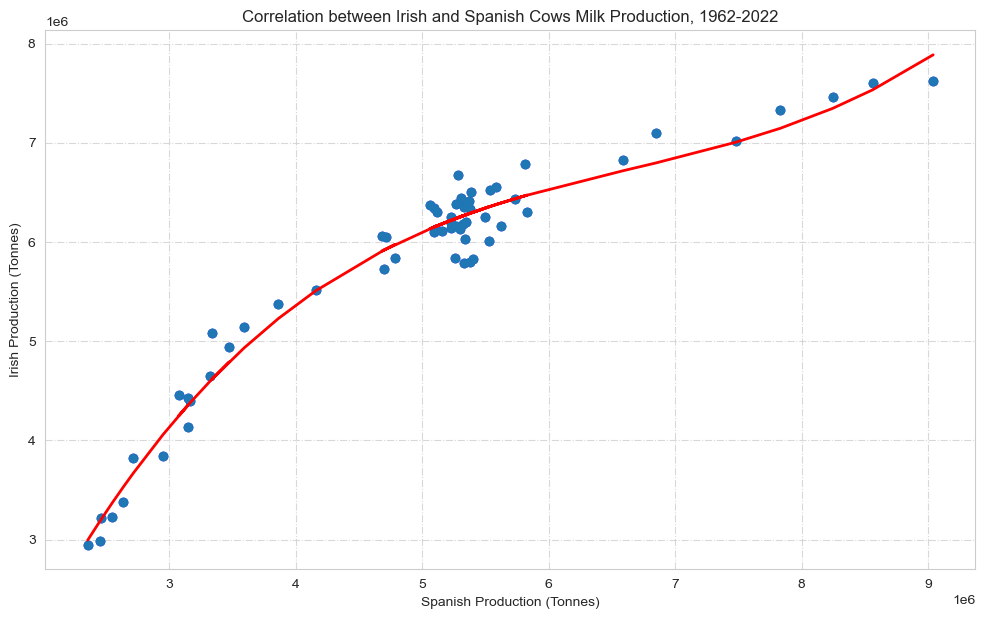

In [198]:
#plot correlation
fig,ax=plt.subplots(figsize=(12,7))

ax.scatter(dftempire['Value (Tonnes)'],dftempes['Value (Tonnes)'],color='b')
ax.set_title(f'Correlation between Irish and Spanish Cows Milk Production, 1962-2022')
ax.set_ylabel('Irish Production (Tonnes)')
ax.set_xlabel('Spanish Production (Tonnes)')
ax.grid(True,ls='-.', alpha=0.75)

coefficients = np.polyfit(dftempire['Value (Tonnes)'], dftempes['Value (Tonnes)'], deg=3)
polynomial = np.poly1d(coefficients)
line = polynomial(dftempire['Value (Tonnes)'])

# add the line of best fit to the scatter plot
plt.scatter(dftempire['Value (Tonnes)'], dftempes['Value (Tonnes)'])
plt.plot(dftempire['Value (Tonnes)'], line, 'r-', linewidth=2);

Visually this 2nd degree polynomial line of best fit is a more suitable model of the correlation between irish and spanish milk production.

## Selling price data

In [199]:
#Read the two relevant data sets and manipulate together given that they are formatted the same way as seen below. 
df1=pd.read_csv("/Users/markc/Documents/Data Analytics Masters/CA2/Data/Dairy Data/X ESTAT Selling Price of Cows Milk 2000-2022 ALL COUNTRIES.csv")
df2=pd.read_csv("/Users/markc/Documents/Data Analytics Masters/CA2/Data/Dairy Data/X ESTAT Selling Price of Cows Milk 1969-2005 ALL COUNTRIES.csv")

#Inspect Datasets                
print('Shape of df containing selling price of cows milk 2000-2022',df1.shape)
print('Shape of df containing selling price of cows milk 1969-2005:',df2.shape)
display('Head of 00-22 dataframe: ', df1.head(10))
display('Head of 69-05 dataframe: ', df2.head(10))

Shape of df containing selling price of cows milk 2000-2022 (2043, 9)
Shape of df containing selling price of cows milk 1969-2005: (2619, 9)


'Head of 00-22 dataframe: '

,DATAFLOW,LAST UPDATE,freq,currency,prod_ani,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2000,27.83,NaN
1,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2001,31.90,NaN
2,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2002,30.14,NaN
3,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2003,28.18,NaN
4,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2004,27.89,NaN
5,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2005,27.95,NaN
6,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2006,28.54,NaN
7,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2007,32.25,NaN
8,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2008,37.51,NaN
9,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2009,27.69,NaN


'Head of 69-05 dataframe: '

,DATAFLOW,LAST UPDATE,freq,currency,prod_apr,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1974,12.79,NaN
1,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1975,13.46,NaN
2,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1976,14.92,NaN
3,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1977,16.29,NaN
4,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1978,17.06,NaN
5,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1979,19.06,NaN
6,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1980,20.03,NaN
7,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1981,21.62,NaN
8,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1982,23.90,NaN
9,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1983,25.80,NaN


In [200]:
#breifly inspect dfs
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     2043 non-null   object 
 1   LAST UPDATE  2043 non-null   object 
 2   freq         2043 non-null   object 
 3   currency     2043 non-null   object 
 4   prod_ani     2043 non-null   int64  
 5   geo          2043 non-null   object 
 6   TIME_PERIOD  2043 non-null   int64  
 7   OBS_VALUE    1991 non-null   float64
 8   OBS_FLAG     62 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 143.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     2619 non-null   object 
 1   LAST UPDATE  2619 non-null   object 
 2   freq         2619 non-null   object 
 3   currency     2619 non-null   object 
 4   prod_apr     2619 non-null   int64  
 5   geo          2619 non-null   object 
 6   TIME_PERIOD  2619 non-null   int64  
 7   OBS_VALUE    2619 non-null   float64
 8   OBS_FLAG     0 non-null      float64
dtypes: float64(2), int64(2), object(5)
memory usage: 184.3+ KB


None

In [201]:
#Check columns before trimming any columns of no use to analysis
display(df1.describe(include='all'))
display(df2.describe(include='all'))

,DATAFLOW,LAST UPDATE,freq,currency,prod_ani,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
count,2043,2043,2043,2043,2043.00,2043,2043.00,1991.00,62
unique,1,1,1,2,NaN,29,NaN,NaN,3
top,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,NaN,DK,NaN,NaN,z
freq,2043,2043,2043,1022,NaN,130,NaN,NaN,36
mean,NaN,NaN,NaN,NaN,12111738.13,NaN,2010.56,159.87,NaN
std,NaN,NaN,NaN,NaN,650.06,NaN,6.23,878.48,NaN
min,NaN,NaN,NaN,NaN,12111000.00,NaN,2000.00,8.72,NaN
25%,NaN,NaN,NaN,NaN,12111000.00,NaN,2005.00,29.01,NaN
50%,NaN,NaN,NaN,NaN,12112000.00,NaN,2011.00,33.31,NaN
75%,NaN,NaN,NaN,NaN,12112000.00,NaN,2016.00,42.53,NaN


,DATAFLOW,LAST UPDATE,freq,currency,prod_apr,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
count,2619,2619,2619,2619,2619.00,2619,2619.00,2619.00,0.00
unique,1,1,1,2,NaN,28,NaN,NaN,NaN
top,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,NaN,LU,NaN,NaN,NaN
freq,2619,2619,2619,1345,NaN,198,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5234.95,NaN,1989.84,151.45,NaN
std,NaN,NaN,NaN,NaN,95.91,NaN,9.93,1161.65,NaN
min,NaN,NaN,NaN,NaN,5180.00,NaN,1969.00,0.06,NaN
25%,NaN,NaN,NaN,NaN,5180.00,NaN,1982.00,20.28,NaN
50%,NaN,NaN,NaN,NaN,5185.00,NaN,1991.00,28.63,NaN
75%,NaN,NaN,NaN,NaN,5185.00,NaN,1998.00,37.51,NaN


In [202]:
#Make sure that all data in both datasets is recorded in euro.
dftemp=df1[df1.currency== 'NAC']
dftemp1=df2[df2.currency== 'NAC']
display(dftemp)
display(dftemp1)

#create country list for later. Update when country list is cut down.
countries=df1['geo'].unique()
print(countries)

,DATAFLOW,LAST UPDATE,freq,currency,prod_ani,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
1021,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12111000,AT,2000,27.83,NaN
1022,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12111000,AT,2001,31.90,NaN
1023,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12111000,AT,2002,30.14,NaN
1024,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12111000,AT,2003,28.18,NaN
1025,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12111000,AT,2004,27.89,NaN
...,...,...,...,...,...,...,...,...,...
2038,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,RO,2019,285.00,NaN
2039,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,RO,2020,292.00,NaN
2040,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,RO,2021,287.00,NaN
2041,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,SI,2014,NaN,z


,DATAFLOW,LAST UPDATE,freq,currency,prod_apr,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
1274,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5180,AT,1973,18.39,NaN
1275,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5180,AT,1974,20.35,NaN
1276,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5180,AT,1975,21.08,NaN
1277,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5180,AT,1976,21.73,NaN
1278,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5180,AT,1977,22.31,NaN
...,...,...,...,...,...,...,...,...,...
2614,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5411,UK,1989,22.51,NaN
2615,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5411,UK,1990,23.59,NaN
2616,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5411,UK,1991,24.75,NaN
2617,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5411,UK,1992,24.75,NaN


['AT' 'BE' 'BG' 'CZ' 'DE' 'DK' 'EL' 'ES' 'FI' 'FR' 'HR' 'IE' 'LT' 'LU'
 'LV' 'NL' 'PT' 'RO' 'SE' 'SI' 'UK' 'EE' 'HU' 'IT' 'MT' 'PL' 'SK' 'CY'
 'XK']


Delete all rows containing 'NAC' in the currency col. This is duplicate data but all OBS_VALUEs are
converted to local currency. We will operate in euro to avoid having to perform currency conversion. 

In [203]:
#Delete all rows containing 'NAC' in the currency col. This is duplicate data but all OBS_VALUEs are
#converted to local currency. We will operate in euro to avoid having to perform currency conversion. 
df1=df1[df1.currency!='NAC'] 
df2=df2[df2.currency!='NAC']

print('df1:',df1.shape)
print('df2:',df2.shape)

df1: (1021, 9)
df2: (1274, 9)


In [204]:
df2

,DATAFLOW,LAST UPDATE,freq,currency,prod_apr,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1974,12.79,NaN
1,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1975,13.46,NaN
2,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1976,14.92,NaN
3,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1977,16.29,NaN
4,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1978,17.06,NaN
...,...,...,...,...,...,...,...,...,...
1269,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5411,UK,1989,33.43,NaN
1270,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5411,UK,1990,33.05,NaN
1271,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5411,UK,1991,35.31,NaN
1272,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5411,UK,1992,33.55,NaN


In [205]:
drop_cols=['DATAFLOW','LAST UPDATE','freq','currency','OBS_FLAG']
countries=('ES','IE')

#Filter dataset by countries and keep desired countries-top 7 milk producers in eu
df1=df1[df1.iloc[:,5].isin(countries)]
df2=df2[df2.iloc[:,5].isin(countries)]

print(df1.shape)
print(df2.shape)

(99, 9)
(174, 9)


In [206]:
df2

,DATAFLOW,LAST UPDATE,freq,currency,prod_apr,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
176,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,ES,1987,25.32,NaN
177,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,ES,1988,28.15,NaN
178,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,ES,1989,34.77,NaN
179,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,ES,1990,29.49,NaN
180,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,ES,1991,27.85,NaN
...,...,...,...,...,...,...,...,...,...
1125,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5411,IE,2001,82.78,NaN
1126,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5411,IE,2002,84.69,NaN
1127,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5411,IE,2003,85.51,NaN
1128,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5411,IE,2004,85.17,NaN


In [207]:
#drop unecessary columns
df1=df1.drop(columns=drop_cols)
df2=df2.drop(columns=drop_cols)
print('df1:',df1.shape)
print('df1:',df1)
print('df2:',df2.shape)
print('df2:',df2)

df1: (99, 4)
df1:      prod_ani geo  TIME_PERIOD  OBS_VALUE
148  12111000  ES         2002      29.23
149  12111000  ES         2003      28.24
150  12111000  ES         2004      29.89
151  12111000  ES         2005      29.37
152  12111000  ES         2006      28.61
..        ...  ..          ...        ...
986  12113000  IE         2008     112.25
987  12113000  IE         2009     111.72
988  12113000  IE         2010     110.97
989  12113000  IE         2011      33.67
990  12113000  IE         2012      29.62

[99 rows x 4 columns]
df2: (174, 4)
df2:       prod_apr geo  TIME_PERIOD  OBS_VALUE
176       5180  ES         1987      25.32
177       5180  ES         1988      28.15
178       5180  ES         1989      34.77
179       5180  ES         1990      29.49
180       5180  ES         1991      27.85
...        ...  ..          ...        ...
1125      5411  IE         2001      82.78
1126      5411  IE         2002      84.69
1127      5411  IE         2003      85.51
1128  

In [208]:
#sanity check- make sure correct countries are removed from dataset
print(df1['geo'].unique())
print(df2['geo'].unique())

['ES' 'IE']
['ES' 'IE']


In [209]:
#rename columns prior to joining of datasets
df1.rename(columns={'prod_ani':'Product_Code','geo':'Country','TIME_PERIOD':'Year','OBS_VALUE':'Price'},inplace=True)
df2.rename(columns={'prod_apr':'Product_Code','geo':'Country','TIME_PERIOD':'Year','OBS_VALUE':'Price'},inplace=True)
#sanity check
print('df1:\n',df1.head())
print('df2:\n',df2.head())


df1:
      Product_Code Country  Year  Price
148      12111000      ES  2002  29.23
149      12111000      ES  2003  28.24
150      12111000      ES  2004  29.89
151      12111000      ES  2005  29.37
152      12111000      ES  2006  28.61
df2:
      Product_Code Country  Year  Price
176          5180      ES  1987  25.32
177          5180      ES  1988  28.15
178          5180      ES  1989  34.77
179          5180      ES  1990  29.49
180          5180      ES  1991  27.85


In [210]:
print(df2.dtypes)
print(df2.shape)

print(df1.dtypes)
print(df1.shape)

Product_Code      int64
Country          object
Year              int64
Price           float64
dtype: object
(174, 4)
Product_Code      int64
Country          object
Year              int64
Price           float64
dtype: object
(99, 4)


In [211]:
#Match up old and new data tags in prod_ani column to allow for effective sorting when merged
df1.replace(12111000,5180,inplace=True)
df1.replace(12112000,5185,inplace=True)
df1.replace(12113000,5411,inplace=True)

In [212]:
#sanity check
print(df2['Country'].unique())
print(df2['Product_Code'].unique())
print(df1['Product_Code'].unique())

['ES' 'IE']
[5180 5185 5411]
[5180 5185 5411]


In [213]:
#merge dataframes
frames=[df1,df2]
df1=pd.concat(frames)
df1.shape

(273, 4)

In [214]:
df1

,Product_Code,Country,Year,Price
148,5180,ES,2002,29.23
149,5180,ES,2003,28.24
150,5180,ES,2004,29.89
151,5180,ES,2005,29.37
152,5180,ES,2006,28.61
...,...,...,...,...
1125,5411,IE,2001,82.78
1126,5411,IE,2002,84.69
1127,5411,IE,2003,85.51
1128,5411,IE,2004,85.17


In [215]:
#format dataset. Organised by country, then product code then year. 
dfmain1=df1.sort_values(['Country','Product_Code','Year'])
#sanity check
dfmain1

,Product_Code,Country,Year,Price
176,5180,ES,1987,25.32
177,5180,ES,1988,28.15
178,5180,ES,1989,34.77
179,5180,ES,1990,29.49
180,5180,ES,1991,27.85
...,...,...,...,...
986,5411,IE,2008,112.25
987,5411,IE,2009,111.72
988,5411,IE,2010,110.97
989,5411,IE,2011,33.67


In [216]:
df1.reset_index(inplace=True)
df1.drop(['index'],axis=1,inplace=True)
df1

,Product_Code,Country,Year,Price
0,5180,ES,2002,29.23
1,5180,ES,2003,28.24
2,5180,ES,2004,29.89
3,5180,ES,2005,29.37
4,5180,ES,2006,28.61
...,...,...,...,...
268,5411,IE,2001,82.78
269,5411,IE,2002,84.69
270,5411,IE,2003,85.51
271,5411,IE,2004,85.17


In [217]:
print(df1['Product_Code'].unique())

[5180 5185 5411]


## Selling price data for merging

In [218]:
#Isolate raw milk; actual fat content data for countries. This will be merged 
sellingpricedf=df1[df1.Product_Code==5185]
display(sellingpricedf)


,Product_Code,Country,Year,Price
42,5185,ES,2000,27.38
43,5185,ES,2001,30.68
44,5185,ES,2002,28.64
45,5185,ES,2003,28.67
46,5185,ES,2004,30.76
...,...,...,...,...
207,5185,IE,2001,28.60
208,5185,IE,2002,26.38
209,5185,IE,2003,26.00
210,5185,IE,2004,25.99


In [219]:
#Check dataset
print('total N/As in dataset:', sellingpricedf.isnull().sum())

total N/As in dataset: Product_Code    0
Country         0
Year            0
Price           0
dtype: int64


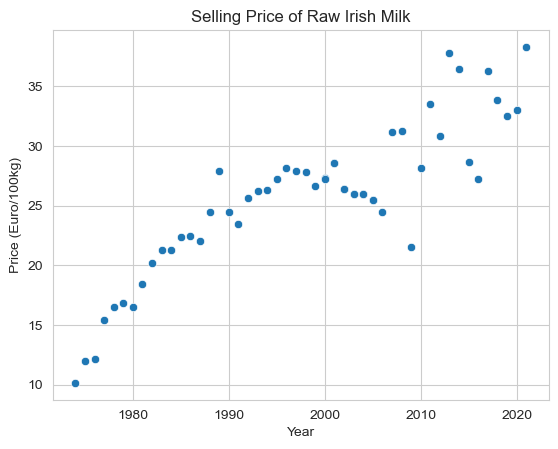

In [220]:
sns.set_style(style='whitegrid')

sns.scatterplot(
    data=sellingpricedf[sellingpricedf.Country=='IE'], 
    x='Year', 
    y='Price', 
    palette='Paired_r'
    )

plt.title('Selling Price of Raw Irish Milk')
plt.xlabel('Year')
plt.ylabel('Price (Euro/100kg)')

plt.show()

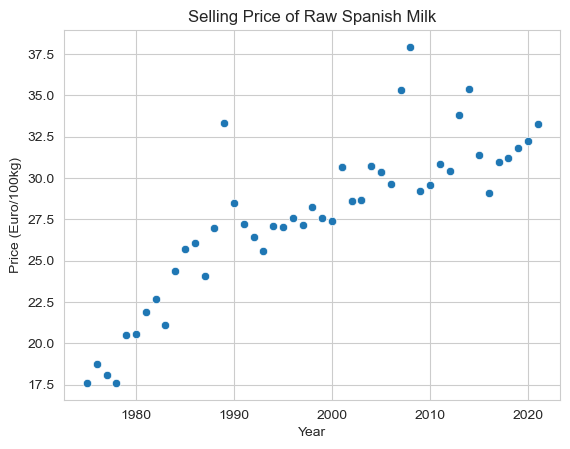

In [221]:
sns.set_style(style='whitegrid')

sns.scatterplot(
    data=sellingpricedf[sellingpricedf.Country=='ES'], 
    x='Year', 
    y='Price', 
    palette='Paired_r'
    )

plt.title('Selling Price of Raw Spanish Milk')
plt.xlabel('Year')
plt.ylabel('Price (Euro/100kg)')

plt.show()

Plot dataset to investigate once finally formatted.

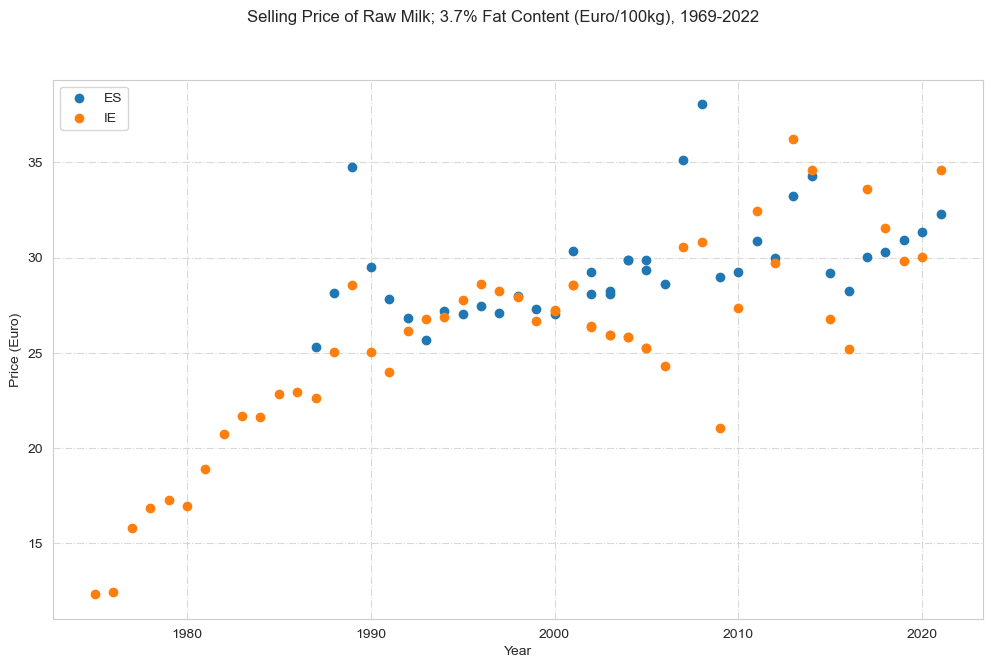

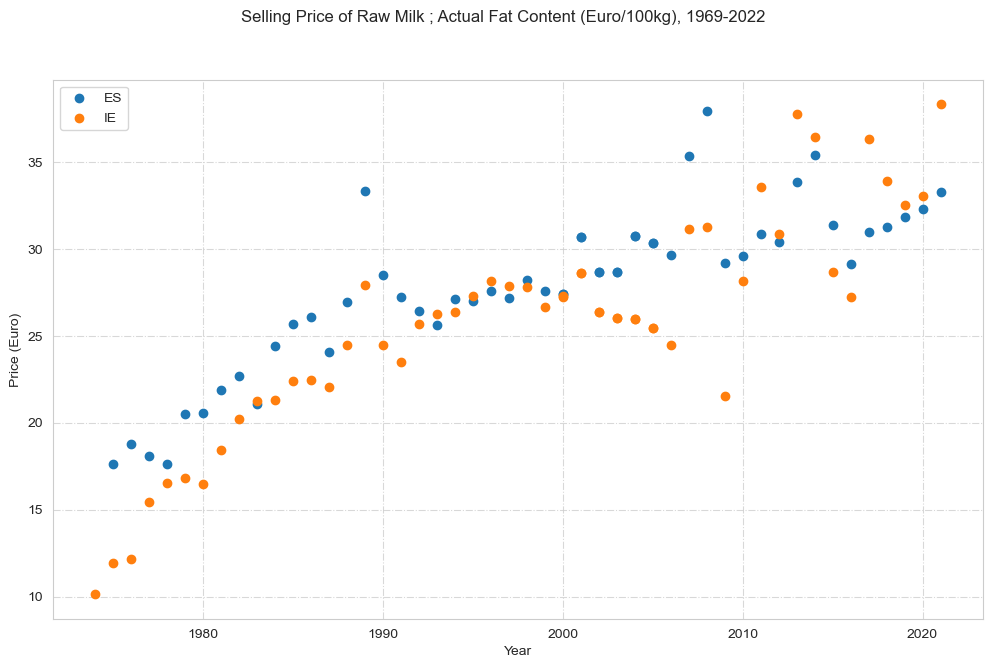

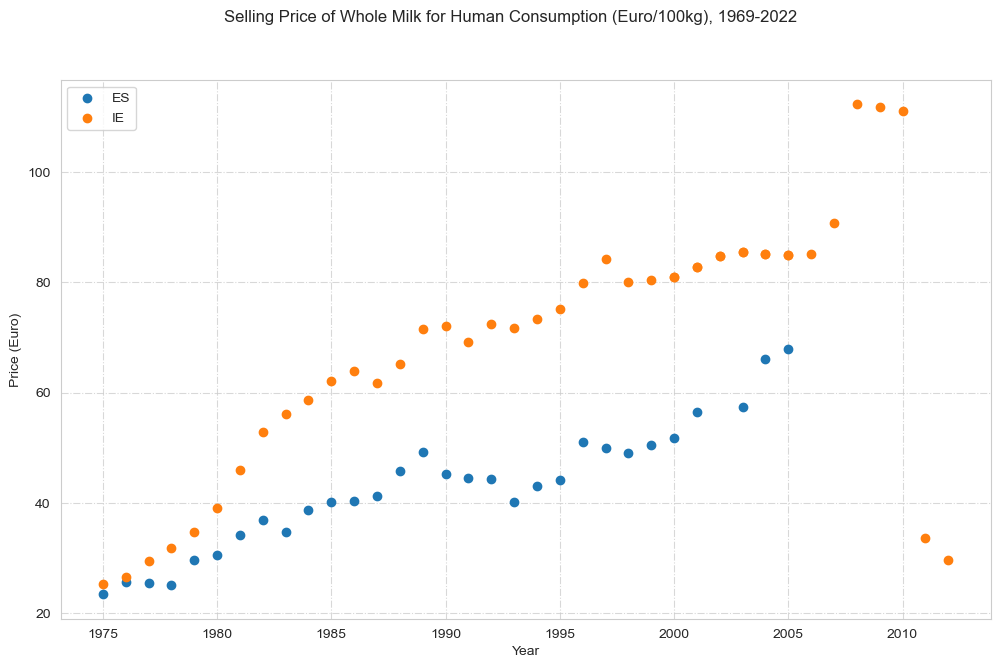

In [222]:
#plot data
countries=df1['Country'].unique()
products=df1['Product_Code'].unique()
productnames=['Raw Milk; 3.7% Fat Content',
              'Raw Milk ; Actual Fat Content',
              'Whole Milk for Human Consumption']

#make plots for each product containing the price of milk over the years per country
for i,product in enumerate(products):
    fig,ax=plt.subplots(figsize=(12,7))
    dftemp=df1[df1.Product_Code==product]
    
    #plot formatting
    #ax.set_title(f'Selling Price of',products[i],' (Euro/100kg), 1969-2022')
    ax.set_ylabel('Value (Euro)')
    ax.grid(True,ls='-.', alpha=0.75)
    
    
    #loop through products and plot data
    for j, country in enumerate(countries):
        dftemp1=dftemp[dftemp.Country==country]
        ax.scatter(dftemp1.Year,dftemp1.Price,label=country, cmap='rainbow')
        
        #plot formatting
        leg=ax.legend(loc='upper left')
        #ax.set_title(f'Selling Price of Cows Milk (Euro/100kg), 1969-2022')
        ax.set_ylabel('Price (Euro)')
        ax.set_xlabel('Year')
        ax.grid(True,ls='-.', alpha=0.75)
    
    fig.suptitle(f'Selling Price of {productnames[i]} (Euro/100kg), 1969-2022')    



## Merge Production and Yield data with Selling Price Data

In [223]:
#Prod and Yield Data
dfmain.drop(columns=['Flag','Flag Description'],inplace=True)
display(dfmain)
print(dfmain.columns)

,Area,Element,Item,Year,Value (Tonnes)
1906,Ireland,Production,Butter of cow milk,1961,61300.00
1907,Ireland,Production,Butter of cow milk,1962,62200.00
1908,Ireland,Production,Butter of cow milk,1963,60346.00
1909,Ireland,Production,Butter of cow milk,1964,64500.00
1910,Ireland,Production,Butter of cow milk,1965,65845.00
...,...,...,...,...,...
5984,Spain,Production,"Whole milk, evaporated",2016,14657.71
5985,Spain,Production,"Whole milk, evaporated",2017,15015.11
5986,Spain,Production,"Whole milk, evaporated",2018,15267.86
5987,Spain,Production,"Whole milk, evaporated",2019,14000.00


Index(['Area', 'Element', 'Item', 'Year', 'Value (Tonnes)'], dtype='object')


In [224]:
#Selling price data
sellingpricedf.drop(columns=['Product_Code'],inplace=True)
display(sellingpricedf)
print(sellingpricedf.columns)


,Country,Year,Price
42,ES,2000,27.38
43,ES,2001,30.68
44,ES,2002,28.64
45,ES,2003,28.67
46,ES,2004,30.76
...,...,...,...
207,IE,2001,28.60
208,IE,2002,26.38
209,IE,2003,26.00
210,IE,2004,25.99


Index(['Country', 'Year', 'Price'], dtype='object')


## Emissions Data

In [225]:
#Read in agricultural emissions dataset specific to cattle (methane, etc).
df3=pd.read_csv("/Users/markc/Documents/Data Analytics Masters/CA2/Data/Dairy Data/X ESTAT Greenhouse Gas Emissions by Source ALL COUNTRIES.csv")

#Inspect Datasets                
print(df3.shape)
display(df3.head(10))
print(df3.dtypes)

(20268, 10)


,DATAFLOW,LAST UPDATE,freq,unit,airpol,src_crf,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,AT,1990,0.18,NaN
1,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,AT,1991,0.18,NaN
2,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,AT,1992,0.17,NaN
3,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,AT,1993,0.18,NaN
4,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,AT,1994,0.18,NaN
5,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,AT,1995,0.18,NaN
6,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,AT,1996,0.18,NaN
7,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,AT,1997,0.17,NaN
8,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,AT,1998,0.17,NaN
9,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,AT,1999,0.17,NaN


DATAFLOW        object
LAST UPDATE     object
freq            object
unit            object
airpol          object
src_crf         object
geo             object
TIME_PERIOD      int64
OBS_VALUE      float64
OBS_FLAG       float64
dtype: object


units associated with greenhouse gas emissions data relating to cattle and dairy production. 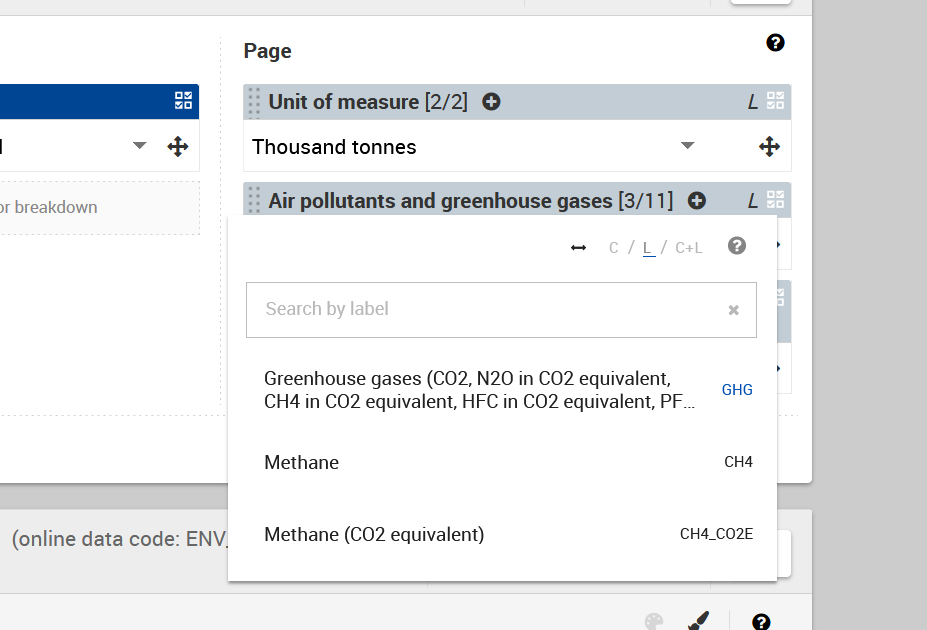

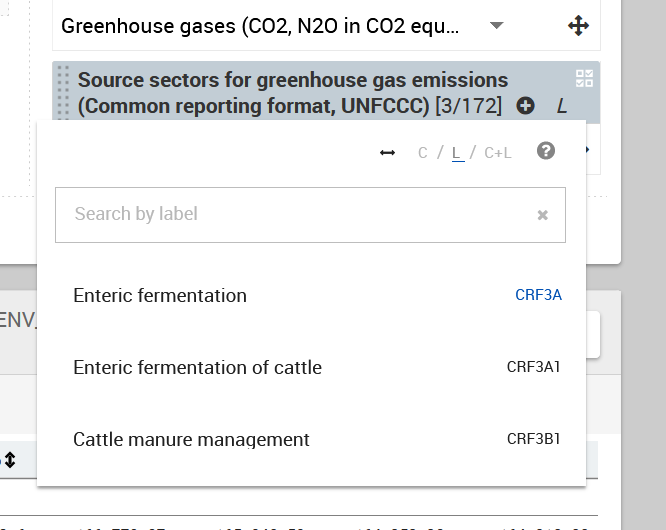

In [226]:
display(df3.describe(include='all'))

,DATAFLOW,LAST UPDATE,freq,unit,airpol,src_crf,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
count,20268,20268,20268,20268,20268,20268,20268,20268.00,20268.00,0.00
unique,1,1,1,2,3,3,36,NaN,NaN,NaN
top,ESTAT:ENV_AIR_GGE(1.0),10/06/2022 11:00,A,MIO_T,CH4,CRF3A,HU,NaN,NaN,NaN
freq,20268,20268,20268,10134,6756,6756,648,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.73,4847.53,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.07,23750.87,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985.00,0.00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997.00,0.67,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.00,15.26,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.00,730.99,NaN


In [227]:
df3['geo'].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'EU27_2020', 'EU28', 'EU28_IS_K', 'FI', 'FR', 'HR', 'HU', 'IE',
       'IS', 'IT', 'LI', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT',
       'RO', 'SE', 'SI', 'SK', 'TR', 'UK'], dtype=object)

In [228]:
drop_cols=['DATAFLOW','LAST UPDATE','OBS_FLAG']
countries=('ES','IE')

#Filter dataset by countries and keep desired countries-top 7 milk producers in eu
df3=df3[df3.iloc[:,6].isin(countries)]
df3.drop(columns=drop_cols,inplace=True)
display(df3)


,freq,unit,airpol,src_crf,geo,TIME_PERIOD,OBS_VALUE
312,A,MIO_T,CH4,CRF3A,ES,1990,0.57
313,A,MIO_T,CH4,CRF3A,ES,1991,0.56
314,A,MIO_T,CH4,CRF3A,ES,1992,0.56
315,A,MIO_T,CH4,CRF3A,ES,1993,0.56
316,A,MIO_T,CH4,CRF3A,ES,1994,0.57
...,...,...,...,...,...,...,...
19731,A,THS_T,GHG,CRF3B1,IE,2016,1449.41
19732,A,THS_T,GHG,CRF3B1,IE,2017,1494.49
19733,A,THS_T,GHG,CRF3B1,IE,2018,1549.33
19734,A,THS_T,GHG,CRF3B1,IE,2019,1468.60


In [229]:
#like previous data, the dataset is duplicated based on the two units of measure MIO_T (million tonnes)
#and THS_T (thousand tonnes). Delete one duplicate and work with the other. Use thousand tonnes unit
#to allow for more resolution in the charts.
df3=df3[df3.unit!='MIO_T'] 
print(df3)

      freq   unit airpol src_crf geo  TIME_PERIOD  OBS_VALUE
10446    A  THS_T    CH4   CRF3A  ES         1990     574.68
10447    A  THS_T    CH4   CRF3A  ES         1991     559.32
10448    A  THS_T    CH4   CRF3A  ES         1992     558.43
10449    A  THS_T    CH4   CRF3A  ES         1993     559.38
10450    A  THS_T    CH4   CRF3A  ES         1994     572.30
...    ...    ...    ...     ...  ..          ...        ...
19731    A  THS_T    GHG  CRF3B1  IE         2016    1449.41
19732    A  THS_T    GHG  CRF3B1  IE         2017    1494.49
19733    A  THS_T    GHG  CRF3B1  IE         2018    1549.33
19734    A  THS_T    GHG  CRF3B1  IE         2019    1468.60
19735    A  THS_T    GHG  CRF3B1  IE         2020    1486.14

[558 rows x 7 columns]


In [230]:
#rename columns prior to joining of datasets
df3.rename(columns={'airpol':'Pollutant','src_crf':'Source','TIME_PERIOD':'Year',
                    'OBS_VALUE':'Emissions(1000_Tons)','geo':'Country'},inplace=True)

#sanity check
print('df3:\n',df3.head())

df3:
       freq   unit Pollutant Source Country  Year  Emissions(1000_Tons)
10446    A  THS_T       CH4  CRF3A      ES  1990                574.68
10447    A  THS_T       CH4  CRF3A      ES  1991                559.32
10448    A  THS_T       CH4  CRF3A      ES  1992                558.43
10449    A  THS_T       CH4  CRF3A      ES  1993                559.38
10450    A  THS_T       CH4  CRF3A      ES  1994                572.30


In [231]:
#Make categories clearer.
df3.replace('CRF3A','Enteric_Fermentation',inplace=True)
df3.replace('CRF3B1','Cattle_Manure_Management',inplace=True)
df3.replace('CRF3A1','Enteric_Fermentation_of_Cattle',inplace=True)
df3['Source'].unique()

array(['Enteric_Fermentation', 'Enteric_Fermentation_of_Cattle',
       'Cattle_Manure_Management'], dtype=object)

## Emissions dataset for merging

In [232]:
emissionsdf=df3[df3.Source=='Enteric_Fermentation_of_Cattle']

display(emissionsdf)

,freq,unit,Pollutant,Source,Country,Year,Emissions(1000_Tons)
11572,A,THS_T,CH4,Enteric_Fermentation_of_Cattle,ES,1990,359.14
11573,A,THS_T,CH4,Enteric_Fermentation_of_Cattle,ES,1991,351.47
11574,A,THS_T,CH4,Enteric_Fermentation_of_Cattle,ES,1992,344.72
11575,A,THS_T,CH4,Enteric_Fermentation_of_Cattle,ES,1993,346.39
11576,A,THS_T,CH4,Enteric_Fermentation_of_Cattle,ES,1994,360.20
...,...,...,...,...,...,...,...
18605,A,THS_T,GHG,Enteric_Fermentation_of_Cattle,IE,2016,11006.72
18606,A,THS_T,GHG,Enteric_Fermentation_of_Cattle,IE,2017,11353.62
18607,A,THS_T,GHG,Enteric_Fermentation_of_Cattle,IE,2018,11653.10
18608,A,THS_T,GHG,Enteric_Fermentation_of_Cattle,IE,2019,11348.40


In [233]:
emissionsdf.drop(columns=['freq','unit','Source'],inplace=True)
emissionsdf

,Pollutant,Country,Year,Emissions(1000_Tons)
11572,CH4,ES,1990,359.14
11573,CH4,ES,1991,351.47
11574,CH4,ES,1992,344.72
11575,CH4,ES,1993,346.39
11576,CH4,ES,1994,360.20
...,...,...,...,...
18605,GHG,IE,2016,11006.72
18606,GHG,IE,2017,11353.62
18607,GHG,IE,2018,11653.10
18608,GHG,IE,2019,11348.40


In [234]:
dfmain3ire=emissionsdf[(emissionsdf['Country'].str.contains('IE')) 
             &(emissionsdf['Pollutant'].str.contains('GHG'))]

dfmain3es=emissionsdf[(emissionsdf['Country'].str.contains('ES')) 
             &(emissionsdf['Pollutant'].str.contains('GHG'))]

#format for merging to ML dataset
dfmain3ire.drop(columns=['Pollutant','Country'],inplace=True)
dfmain3es.drop(columns=['Pollutant','Country'],inplace=True)
display(dfmain3ire)
display(dfmain3es)

,Year,Emissions(1000_Tons)
18579,1990,9210.48
18580,1991,9350.44
18581,1992,9503.20
18582,1993,9580.47
18583,1994,9656.89
18584,1995,9796.50
18585,1996,10195.46
18586,1997,10543.43
18587,1998,10725.93
18588,1999,10457.86


,Year,Emissions(1000_Tons)
18328,1990,8978.38
18329,1991,8786.76
18330,1992,8617.96
18331,1993,8659.66
18332,1994,9004.92
18333,1995,9690.81
18334,1996,10344.85
18335,1997,10152.63
18336,1998,10331.61
18337,1999,10772.27


In [235]:
dfmain3ire.set_index('Year',inplace=True)
dfmain3es.set_index('Year',inplace=True)

In [236]:
dfmain3ire.sort_index(axis=0,inplace=True)
dfmain3es.sort_index(axis=0,inplace=True)

## Main dataset

In [237]:
#original milk production data
dfmain

,Area,Element,Item,Year,Value (Tonnes)
1906,Ireland,Production,Butter of cow milk,1961,61300.00
1907,Ireland,Production,Butter of cow milk,1962,62200.00
1908,Ireland,Production,Butter of cow milk,1963,60346.00
1909,Ireland,Production,Butter of cow milk,1964,64500.00
1910,Ireland,Production,Butter of cow milk,1965,65845.00
...,...,...,...,...,...
5984,Spain,Production,"Whole milk, evaporated",2016,14657.71
5985,Spain,Production,"Whole milk, evaporated",2017,15015.11
5986,Spain,Production,"Whole milk, evaporated",2018,15267.86
5987,Spain,Production,"Whole milk, evaporated",2019,14000.00


In [238]:
#Production data
dfmain1ire=dfmain[(dfmain['Area'].str.contains('Ireland')) 
             &(dfmain['Element'].str.contains('Production'))
             & (dfmain['Item'].str.contains('Raw milk of cattle'))]

dfmain1es=dfmain[(dfmain['Area'].str.contains('Spain')) 
             &(dfmain['Element'].str.contains('Production'))
             & (dfmain['Item'].str.contains('Raw milk of cattle'))]


dfmain1ire.drop(columns=['Area','Element','Item'],inplace=True)
dfmain1es.drop(columns=['Area','Element','Item'],inplace=True)

dfmain1ire.rename(columns={'Value (Tonnes)':'Production (Tonnes)'},inplace=True)
dfmain1es.rename(columns={'Value (Tonnes)':'Production (Tonnes)'},inplace=True)

In [239]:
dfmain1ire

,Year,Production (Tonnes)
2203,1961,2356000.00
2204,1962,2450800.00
2205,1963,2461100.00
2206,1964,2548300.00
2207,1965,2637800.00
...,...,...
2259,2017,7478160.00
2260,2018,7831250.00
2261,2019,8244870.00
2262,2020,8561470.00


In [240]:
#Yield Data
dfmain4ire=dfmain[(dfmain['Area'].str.contains('Ireland')) 
             &(dfmain['Element'].str.contains('Yield'))
             & (dfmain['Item'].str.contains('Raw milk of cattle'))]

dfmain4es=dfmain[(dfmain['Area'].str.contains('Spain')) 
             &(dfmain['Element'].str.contains('Yield'))
             & (dfmain['Item'].str.contains('Raw milk of cattle'))]


dfmain4ire.drop(columns=['Area','Element','Item'],inplace=True)
dfmain4es.drop(columns=['Area','Element','Item'],inplace=True)

dfmain4ire.rename(columns={'Value (Tonnes)':'Yield (hg/An)'},inplace=True)
dfmain4es.rename(columns={'Value (Tonnes)':'Yield (hg/An)'},inplace=True)

In [241]:
dfmain4ire.set_index('Year',inplace=True)
dfmain4es.set_index('Year',inplace=True)

In [242]:
dfmain4ire.sort_index(axis=0,inplace=True)
dfmain4es.sort_index(axis=0,inplace=True)

In [243]:
dfmain1ire.set_index('Year',inplace=True)
dfmain1es.set_index('Year',inplace=True)

In [244]:
dfmain1ire.sort_index(axis=0,inplace=True)
dfmain1es.sort_index(axis=0,inplace=True)

In [245]:
#second set of data covering selling price of milk
sellingpricedf
sellingpricedf.rename(columns={'Price':'Price(Euro/100kg)'})

,Country,Year,Price(Euro/100kg)
42,ES,2000,27.38
43,ES,2001,30.68
44,ES,2002,28.64
45,ES,2003,28.67
46,ES,2004,30.76
...,...,...,...
207,IE,2001,28.60
208,IE,2002,26.38
209,IE,2003,26.00
210,IE,2004,25.99


In [246]:
dfmain2ire=sellingpricedf[(sellingpricedf['Country'].str.contains('IE'))]
dfmain2es=sellingpricedf[(sellingpricedf['Country'].str.contains('ES'))]

dfmain2ire.drop(columns=['Country'],inplace=True)
dfmain2es.drop(columns=['Country'],inplace=True)

dfmain2ire.set_index('Year',inplace=True)
dfmain2es.set_index('Year',inplace=True)

In [247]:
dfmain2ire=dfmain2ire.iloc[6:,:]
dfmain2es=dfmain2es.iloc[6:,:]

In [248]:
dfmain2ire.sort_index(axis=0,inplace=True)
dfmain2es.sort_index(axis=0,inplace=True)

## Form main dataset for ML 

In [293]:
#Concat production and yield data to mldf for Ireland and Spain
ire_ml_df=pd.concat([dfmain1ire,dfmain2ire,dfmain3ire,dfmain4ire],axis=1)
es_ml_df=pd.concat([dfmain1es,dfmain2es,dfmain3es,dfmain4es],axis=1)

ire_ml_df.to_csv('Merged_Data_For_ML_IRE.csv');

In [250]:
display(ire_ml_df.head(30))

,Production (Tonnes),Price,Emissions(1000_Tons),Yield (hg/An)
Year,,,,
1961,2356000.00,NaN,NaN,19536.00
1962,2450800.00,NaN,NaN,20089.00
1963,2461100.00,NaN,NaN,20123.00
1964,2548300.00,NaN,NaN,19987.00
1965,2637800.00,NaN,NaN,19381.00
1966,2716600.00,NaN,NaN,19404.00
1967,2951400.00,NaN,NaN,20755.00
1968,3148700.00,NaN,NaN,21232.00
1969,3145000.00,NaN,NaN,21136.00


In [251]:
display(ire_ml_df.tail())

,Production (Tonnes),Price,Emissions(1000_Tons),Yield (hg/An)
Year,,,,
2017,7478160.00,36.31,11353.62,52197.00
2018,7831250.00,33.87,11653.10,57200.00
2019,8244870.00,32.53,11348.40,57828.00
2020,8561470.00,33.03,11447.76,58799.00
2021,9039990.00,38.31,NaN,60056.00


In [252]:
#No data for all three variables until 1990. Drop all rows up until then.
ire_ml_df=ire_ml_df.iloc[29:,:]
es_ml_df=es_ml_df.iloc[29:,:]

In [253]:
#fill n/a for emissions in 2021 with mean
ire_ml_df=ire_ml_df.fillna(ire_ml_df['Emissions(1000_Tons)'].mean())

Heatmap detailing the correlation between Irish Raw Milk Production (Tonnes),Raw Milk Price (Euro/100kg) and Greenhouse Gas Emissions (1000 Tons), 1990-2022


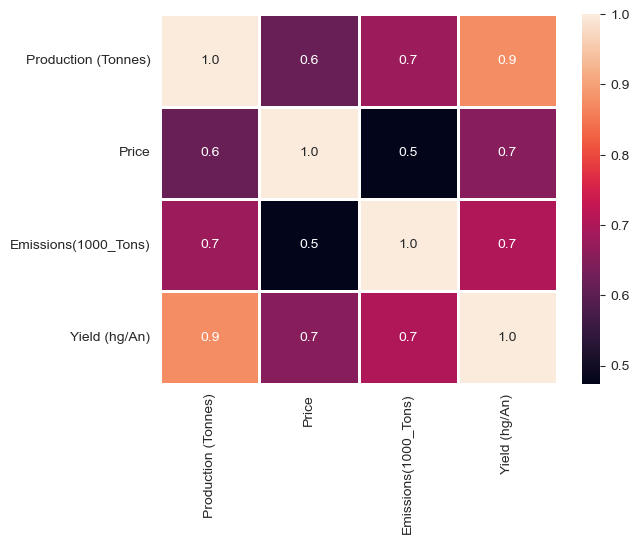

In [254]:
#plot heatmap to explore correlation between variables. 
print('Heatmap detailing the correlation between Irish Raw Milk Production (Tonnes),Raw Milk Price (Euro/100kg) and Greenhouse Gas Emissions (1000 Tons), 1990-2022')
sns.heatmap(ire_ml_df.iloc[:,0:].corr(),annot=True,fmt='.1f',linewidths=1);

Heatmap detailing the correlation between Spanish Raw Milk Production (Tonnes),Raw Milk Price (Euro/100kg) and Greenhouse Gas Emissions (1000 Tons), 1990-2022


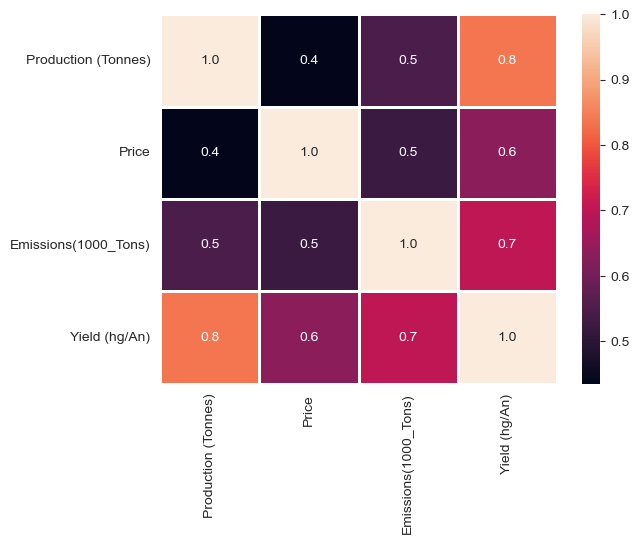

In [255]:
#plot heatmap to explore correlation between variables. 
print('Heatmap detailing the correlation between Spanish Raw Milk Production (Tonnes),Raw Milk Price (Euro/100kg) and Greenhouse Gas Emissions (1000 Tons), 1990-2022')
sns.heatmap(es_ml_df.iloc[:,0:].corr(),annot=True,fmt='.1f',linewidths=1);

## Model Application

In [256]:
#Normalise data
scaler=StandardScaler()


#Irish data
ire_ml_df_norm=pd.DataFrame(scaler.fit_transform(ire_ml_df),columns=ire_ml_df.columns)

#Spanish data
es_ml_df_norm=pd.DataFrame(scaler.fit_transform(es_ml_df),columns=es_ml_df.columns)

In [257]:
#Split data into test and train

#Irish data
y=ire_ml_df_norm['Production (Tonnes)']
X=ire_ml_df_norm.drop(['Production (Tonnes)'],axis=1)

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 41)

In [259]:
#Check dimensions of the training and test sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 3)
(10, 3)
(22,)
(10,)


In [279]:
#Assign linear regression model function to object lrm
lrm = LinearRegression()
#Fit the lin reg model
lrm.fit(X_train, y_train) 

LinearRegression()

In [280]:
y_preds_train=lrm.predict(X_train)
y_preds_test=lrm.predict(X_test)

In [284]:
print("-----Training set statistics-----")
print("\033[1mR-squared of the model in training set is:\033[0m {}".format(lrm.score(X_train, y_train)))
print("\033[1mAdjusted R-squared of the model in training set is:\033[0m {}".format(1 - (1-lrm.score(X_train, y_train)
                                                                                     )*(len(y)-1)/(len(y)-X.shape[1]-1)))
print("-----Test set statistics-----")
print("\033[1mR-squared of the model in test set is:\033[0m {}".format(lrm.score(X_test, y_test)))
print("\033[1m Adjusted R-squared of the model in test set is:\033[0m {}".format(1 - (1-lrm.score(X_test, y_test)
                                                                                     )*(len(y)-1)/(len(y)-X.shape[1]-1)))
print("\033[1mRoot mean squared error of the prediction is:\033[0m {}".format(rmse(y_test, y_preds_test)))
print("\033[1mMean absolute percentage error of the prediction is:\033[0m {}".format(np.mean(np.abs((y_test - y_preds_test)
                                                                                                    / y_test)) * 100))

-----Training set statistics-----
R-squared of the model in training set is: 0.7237392654876973
Adjusted R-squared of the model in training set is: 0.6941399010756648
-----Test set statistics-----
R-squared of the model in test set is: 0.7551542687511499
 Adjusted R-squared of the model in test set is: 0.728920797545916
Root mean squared error of the prediction is: 0.5770035466049936
Mean absolute percentage error of the prediction is: 41.03069874828498


In [260]:
reg=LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
models,pred=reg.fit(X_train,X_test,y_train,y_test)
models

 50%|█████████████████████████████████████████                                         | 21/42 [00:00<00:00, 59.64it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 62.45it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
OrthogonalMatchingPursuit,0.75,0.83,0.48,0.01
HuberRegressor,0.64,0.76,0.57,0.01
OrthogonalMatchingPursuitCV,0.64,0.76,0.57,0.01
LassoLarsIC,0.64,0.76,0.57,0.01
TransformedTargetRegressor,0.63,0.76,0.58,0.00
LinearRegression,0.63,0.76,0.58,0.00
Lars,0.63,0.76,0.58,0.01
LassoCV,0.63,0.75,0.58,0.04
KernelRidge,0.62,0.75,0.59,0.01


Initial poor performance by first round of modelling, likely due to the lack of data points (only around 30). Given that no model performs well with this data which follows a regular pattern as seen above, it is likely the case that lack of data is the issue. Incorporated milk yield to see if another variable aids the analysis.

## Summary Dashboard

In [261]:
#Irish data
prof=ProfileReport(ire_ml_df,title='Data Summary Report')
prof.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Sentiment Analysis

## Dairy Analysis (General and country-specific)

Sentiment analysis is to be performed using a twitter API to create a database of related tweets, and textblob to classify the sentiment of each tweet.

Perform sentiment analysis for dairy milk

In [268]:
#Create client using bearer token.
client=tweepy.Client("AAAAAAAAAAAAAAAAAAAAAKs8lAEAAAAAorbMQOKSsK16dl8bJVElcSGafYY%3DUUjUq6aLoFu8dHNl1tBeuwWBDBtgTbEwVwwrQ4zE9zzxKQyz99")

#define search terms to best capture the perception of the dairy industry.
query="dairy OR cow milk -is:retweet"
max_results=100
limit=10000

#capture tweets in dictionaries and create dataframe for later analysis.    
twitter_dairy_data=[]

for tweet in tweepy.Paginator(client.search_recent_tweets,query=query,max_results=max_results,tweet_fields=['text']
                             ).flatten(limit=limit):
    text = tweet["text"]
    sentiment = TextBlob(text).sentiment.polarity      #textblob calculates the sentiment of each tweet  and produces a value 
                                                       # between -1 (very negative) and +1 (very positive). 
    tweet_dict={"text":text, "sentiment":sentiment}
    twitter_dairy_data.append(tweet_dict)
    
twitter_dairy_df = pd.DataFrame(twitter_dairy_data)
twitter_dairy_df.shape

(10000, 2)

In [269]:
twitter_dairy_df.describe()

,sentiment
count,10000.00
mean,0.06
std,0.24
min,-1.00
25%,0.00
50%,0.00
75%,0.16
max,1.00


In [276]:
twitter_dairy_df

,text,sentiment
0,RT @GordonRussell1: Between our website having...,-0.03
1,"RT @Infosahakarita: After Nano Urea, Nishikant...",0.00
2,RT @JohnOberg: This mother cow is desperately ...,-0.24
3,@kaptain_g @doyyeene @Iamcutelarry @captain_so...,0.16
4,RT @veganfuture: Plant-Based Milk Posing a Thr...,0.00
...,...,...
9995,RT @afrosabi: Y'all... maybe if we get their f...,0.09
9996,RT @AntiDairyMoms: Humans don't need to drink ...,0.17
9997,"RT @KapilMishra_IND: दाढ़ी नोचने , ज़बरदस्ती ज...",0.00
9998,@BukkakeKamikaze I suddenly have an interest i...,0.00


Visualise results

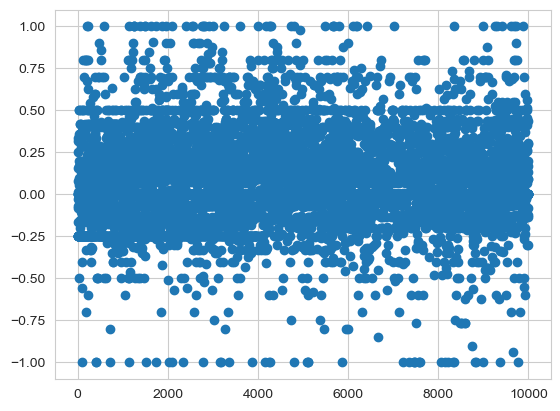

In [271]:
plt.scatter(twitter_dairy_df.index,twitter_dairy_df['sentiment']);

Perform sentiment analysis for dairy alternatives

One must consider the query terms and how they may be relating to subjects other than the one at hand. For example, a new album called 'oat' (for whatever reason it would be called this) could be trending and therefore tweets relating to the album's success or failure would be captured by our search, rather than tweets about dairy alternatives. Therefore our sentiment analysis would be skewed. 

In [272]:
#Create client using bearer token.
client=tweepy.Client("AAAAAAAAAAAAAAAAAAAAAKs8lAEAAAAAorbMQOKSsK16dl8bJVElcSGafYY%3DUUjUq6aLoFu8dHNl1tBeuwWBDBtgTbEwVwwrQ4zE9zzxKQyz99")

#define search terms to best capture the perception of the dairy industry.
query="oat OR almond OR soy milk OR dairy alternative  -is:retweet"
max_results=100
limit=10000

#capture tweets in dictionaries and create dataframe for later analysis.    
twitter_alternative_data=[]

for tweet in tweepy.Paginator(client.search_recent_tweets,query=query,max_results=max_results,tweet_fields=['text']
                             ).flatten(limit=limit):
    text = tweet["text"]
    sentiment = TextBlob(text).sentiment.polarity      #textblob calculates the sentiment of each tweet  and produces a value 
                                                       # between -1 (very negative) and +1 (very positive). 
    tweet_dict={"text":text, "sentiment":sentiment}
    twitter_alternative_data.append(tweet_dict)
    
twitter_alternative_df = pd.DataFrame(twitter_alternative_data)
twitter_alternative_df.shape

(10000, 2)

In [273]:
twitter_alternative_df.describe()

,sentiment
count,10000.00
mean,0.25
std,0.18
min,-1.00
25%,0.20
50%,0.23
75%,0.38
max,1.00


Visualise results

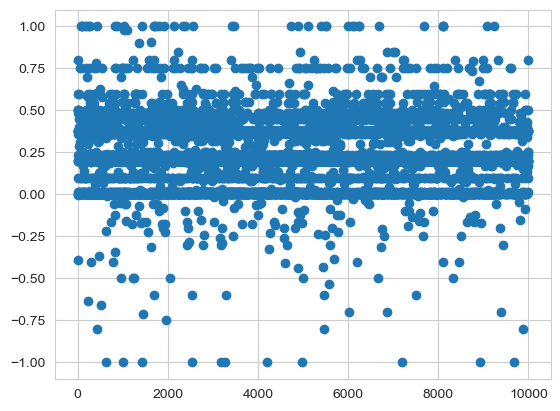

In [274]:
plt.scatter(twitter_alternative_df.index,twitter_alternative_df['sentiment']);